lets get started 

# Data loading

In [11]:
# import all the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import rf model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, precision_score, recall_score


# get the train , test data

In [12]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
y_test= pd.read_csv('sample_submission.csv')


In [13]:
train.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4990     1       A    M1       CNG  ...              No   
1               27003     1       A    M1       CNG  ...              No   
2                4076     1       A    M1       CNG  ...              No   
3               21622     1      C1    M2    Petrol  ...             Yes   
4               34738     2       A    M3    Petrol  ...              No   

  is_power_door_locks is_central_locking  is_power_steering  \
0                  No                 No                Yes   
1                  No                 No                Yes   
2                  No                 No                Yes   
3                 Yes                Yes                Yes   
4                 Yes                Yes                Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   
3                              Yes                           Yes    Yes   
4                               No                           Yes    Yes   

  is_speed_alert ncap_rating is_claim  
0            Yes           0        0  
1            Yes           0        0  
2            Yes           0        0  
3            Yes           2        0  
4            Yes           2        0  

[5 rows x 44 columns]

In [14]:
test.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID58593       0.341732        0.00             0.586538           C3   
1   ID58594       0.307241        0.13             0.442308           C8   
2   ID58595       0.327924        0.12             0.451923           C8   
3   ID58596       0.782654        0.01             0.461538           C5   
4   ID58597       1.233404        0.02             0.634615           C5   

   population_density  make segment model fuel_type  ...  \
0                4076     1       A    M1       CNG  ...   
1                8794     1      B2    M6    Petrol  ...   
2                8794     2       A    M3    Petrol  ...   
3               34738     1       A    M1       CNG  ...   
4               34738     1       A    M1       CNG  ...   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No             Yes                 Yes   
2                      No              No                 Yes   
3                      No              No                  No   
4                      No              No                  No   

   is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                  No               Yes                               No   
1                 Yes               Yes                              Yes   
2                 Yes               Yes                               No   
3                  No               Yes                               No   
4                  No               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert ncap_rating  
0                            No     No            Yes           0  
1                           Yes    Yes            Yes           2  
2                           Yes    Yes            Yes           2  
3                            No     No            Yes           0  
4                            No     No            Yes           0  

[5 rows x 43 columns]

In [15]:
y_test.head()

policy_id  is_claim
0   ID58593         1
1   ID58594         1
2   ID58595         1
3   ID58596         1
4   ID58597         1

In [16]:
#get the shape of the data
print("train.shape, test.shape, y_test.shape", train.shape, test.shape, y_test.shape)
print("info of train data")
print(train.info())
print("info of test data")
print(test.info())  
print("info of y_test data")
print(y_test.info())


train.shape, test.shape, y_test.shape (58592, 44) (39063, 43) (39063, 2)
info of train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        5859

In [17]:
#descriptive statistics
print("describe of train data")
print(train.describe().T)
print("describe of test data")
print(test.describe().T)
print("describe of y_test data")
print(y_test.describe().T)
#median of the data
print("median of train data")
print(train.median(numeric_only=True))
print("median of test data")
print(test.median(numeric_only=True))
print("median of y_test data")
print(y_test.median(numeric_only=True))



describe of train data
                       count          mean           std          min  \
policy_tenure        58592.0      0.611246      0.414156     0.002735   
age_of_car           58592.0      0.069424      0.056721     0.000000   
age_of_policyholder  58592.0      0.469420      0.122886     0.288462   
population_density   58592.0  18826.858667  17660.174792   290.000000   
make                 58592.0      1.763722      1.136988     1.000000   
airbags              58592.0      3.137066      1.832641     1.000000   
displacement         58592.0   1162.355851    266.304786   796.000000   
cylinder             58592.0      3.626963      0.483616     3.000000   
gear_box             58592.0      5.245443      0.430353     5.000000   
turning_radius       58592.0      4.852893      0.228061     4.500000   
length               58592.0   3850.476891    311.457119  3445.000000   
width                58592.0   1672.233667    112.089135  1475.000000   
height               58592.0

 encoding strings

In [18]:
#encode the data have diffrent encoder for each column
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in train.columns:
    if train[col].dtype=='object':
        le = LabelEncoder()

        train[col] = le.fit_transform(train[col])
        label_encoders[col] = le  # Store for later inverse transform
# Access specific encoder later
label_encoders1={}
for col in test.columns:
    if test[col].dtype =='object':
        le = LabelEncoder()

        test[col] = le.fit_transform(test[col])
        label_encoders1[col] = le 
#save the label_encoder1
def save_encoder(file):
    import pickle 
    with open(file, 'wb') as f:
        pickle.dump(label_encoders1, f)
    
        print("done")
save_encoder("le_encoder.pkl")



done


In [19]:
#mising values in the data
print("missing values in train data")
print(train.isnull().sum())
print("missing values in test data")
print(test.isnull().sum())
print("missing values in y_test data")
print(y_test.isnull().sum())
#  --- IGNORE ---


missing values in train data
policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius       

no missing values at all

correlation

In [20]:
#correlation graph between the features
plt.figure(figsize=(120, 100))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [21]:
train

policy_id  policy_tenure  age_of_car  age_of_policyholder  \
0              0       0.515874        0.05             0.644231   
1              1       0.672619        0.02             0.375000   
2              2       0.841110        0.02             0.384615   
3              3       0.900277        0.11             0.432692   
4              4       0.596403        0.11             0.634615   
...          ...            ...         ...                  ...   
58587      58587       0.355089        0.13             0.644231   
58588      58588       1.199642        0.02             0.519231   
58589      58589       1.162273        0.05             0.451923   
58590      58590       1.236307        0.14             0.557692   
58591      58591       0.124429        0.02             0.442308   

       area_cluster  population_density  make  segment  model  fuel_type  ...  \
0                 0                4990     1        0      0          0  ...   
1                11               27003     1        0      0          0  ...   
2                15                4076     1        0      0          0  ...   
3                16               21622     1        3      3          2  ...   
4                17               34738     2        0      4          2  ...   
...             ...                 ...   ...      ...    ...        ...  ...   
58587            20                8794     2        0      4          2  ...   
58588             5                7788     1        0      0          0  ...   
58589            17               34738     1        0      0          0  ...   
58590            20                8794     1        2      7          2  ...   
58591            20                8794     3        4      5          1  ...   

       is_brake_assist  is_power_door_locks  is_central_locking  \
0                    0                    0                   0   
1                    0                    0                   0   
2                    0                    0                   0   
3                    1                    1                   1   
4                    0                    1                   1   
...                ...                  ...                 ...   
58587                0                    1                   1   
58588                0                    0                   0   
58589                0                    0                   0   
58590                1                    1                   1   
58591                1                    1                   1   

       is_power_steering  is_driver_seat_height_adjustable  \
0                      1                                 0   
1                      1                                 0   
2                      1                                 0   
3                      1                                 1   
4                      1                                 0   
...                  ...                               ...   
58587                  1                                 0   
58588                  1                                 0   
58589                  1                                 0   
58590                  1                                 1   
58591                  1                                 1   

       is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                                  0       0               1            0   
1                                  0       0               1            0   
2                                  0       0               1            0   
3                                  1       1               1            2   
4                                  1       1               1            2   
...                              ...     ...             ...          ...   
58587                              1       1               1            2   
58588                              0       0       

explore variable

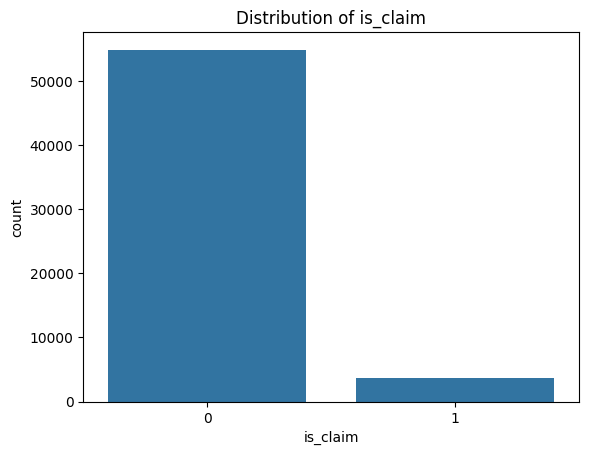

In [22]:
# is_claim is the target variable plot that
sns.countplot(x='is_claim', data=train)
plt.title('Distribution of is_claim')
plt.show()

# univarient analysis

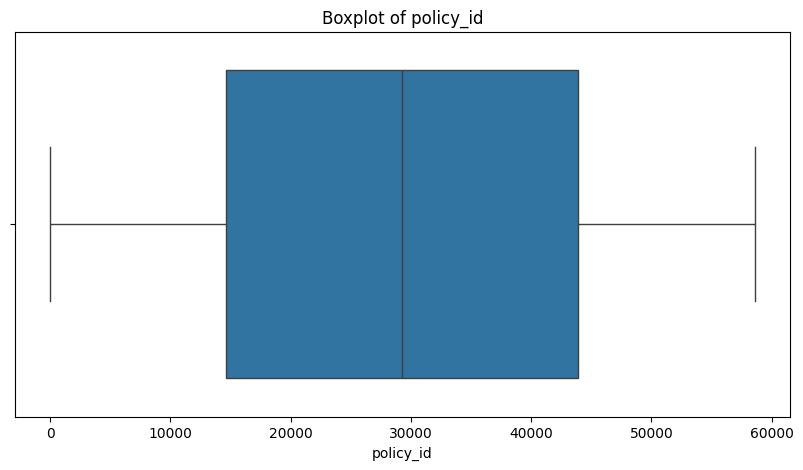

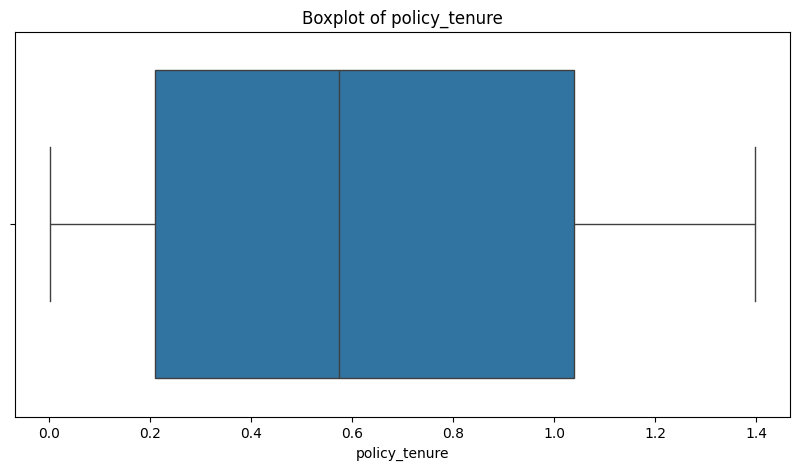

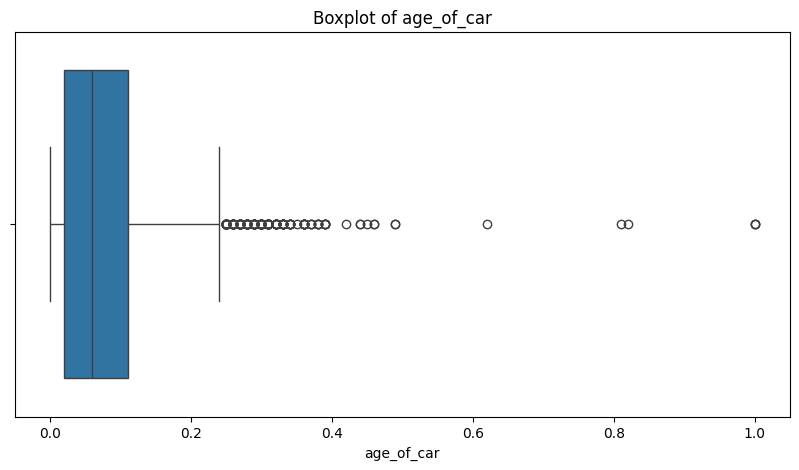

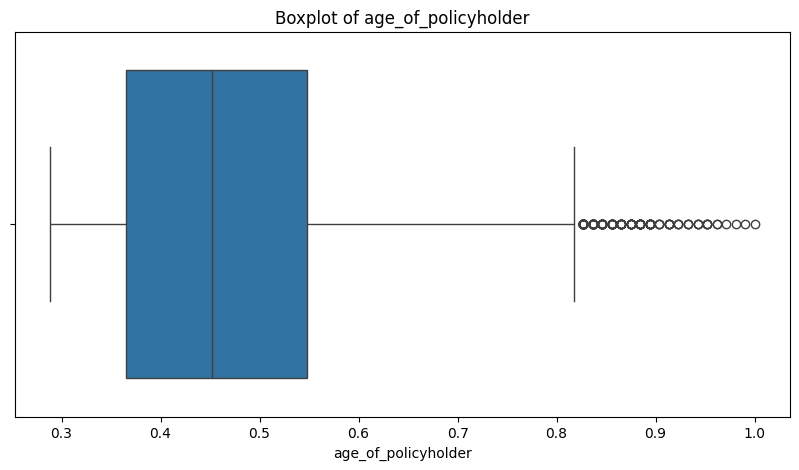

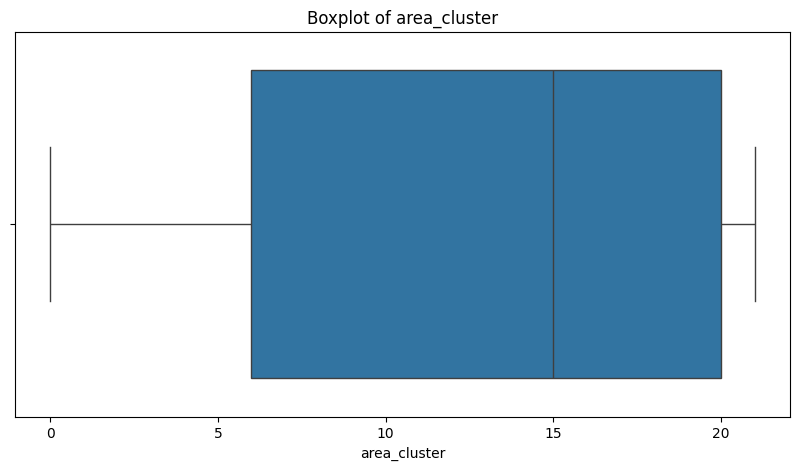

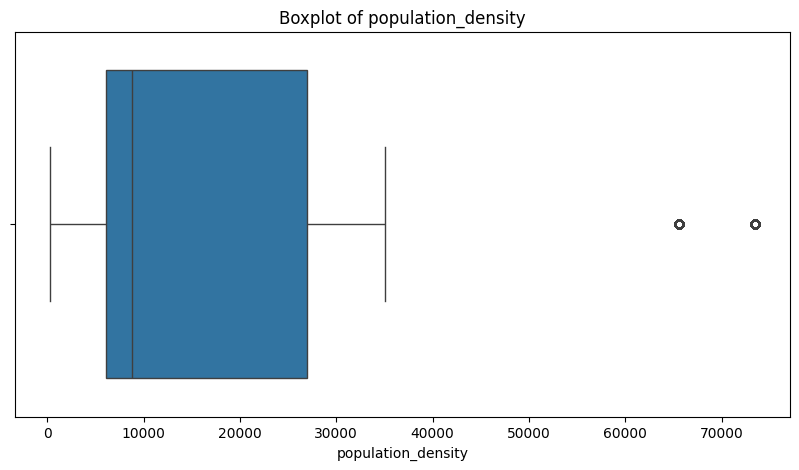

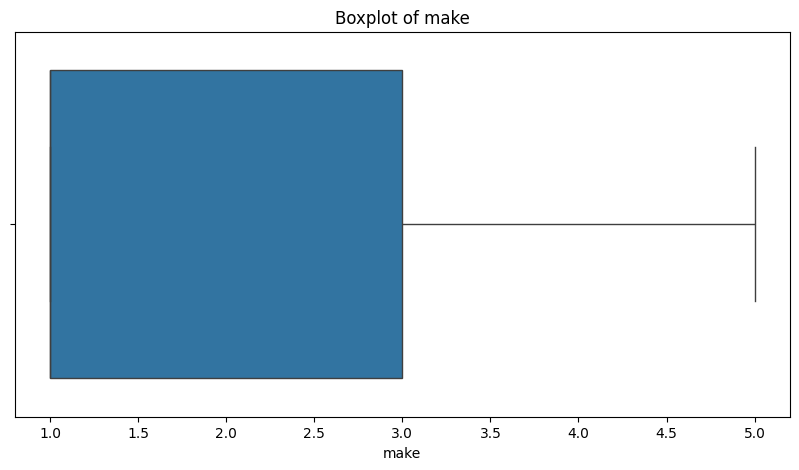

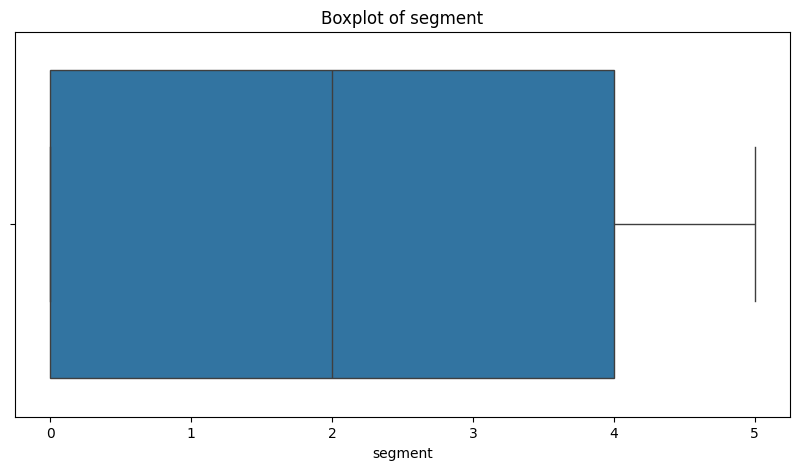

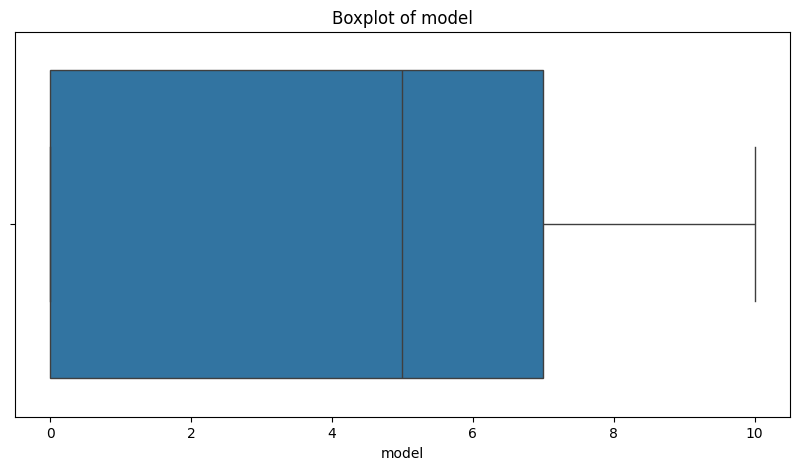

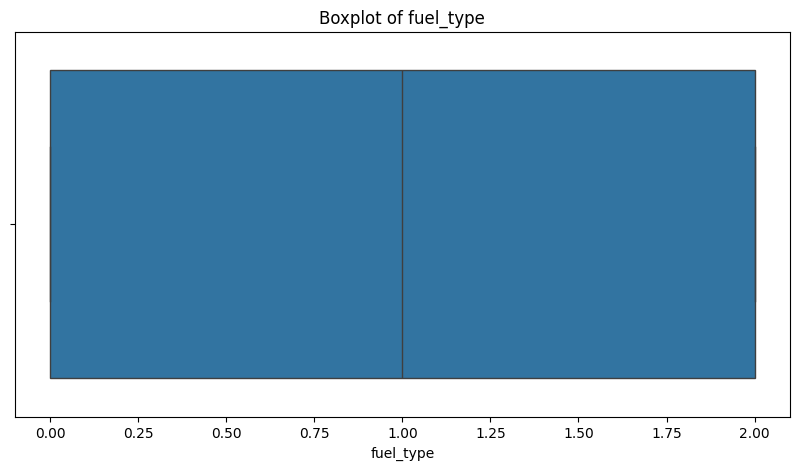

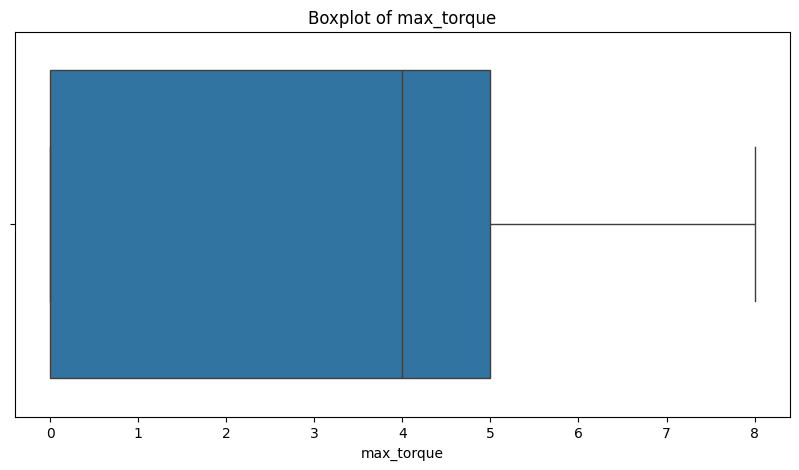

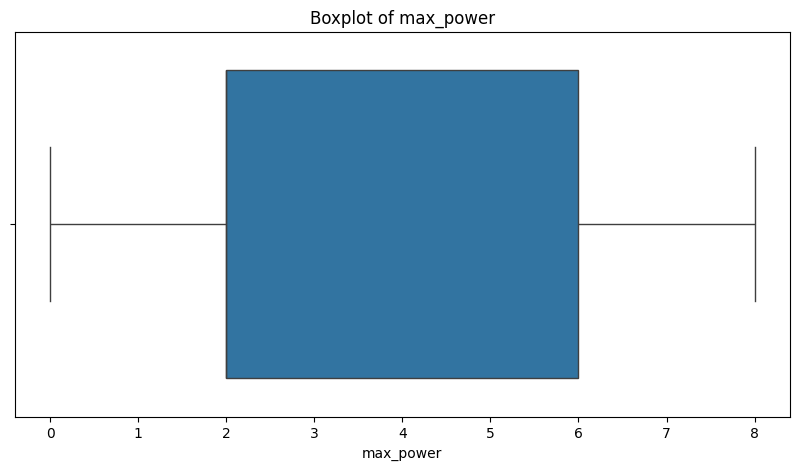

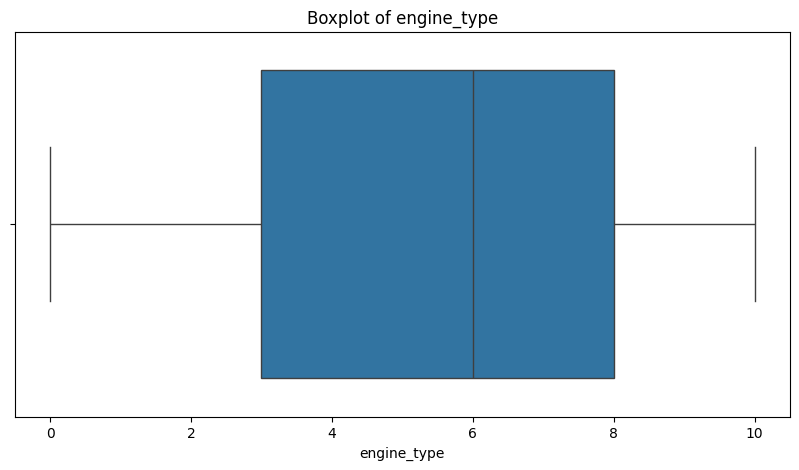

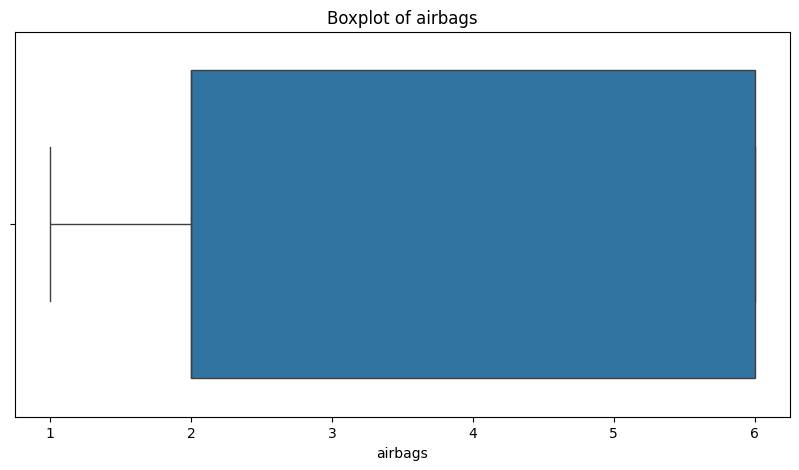

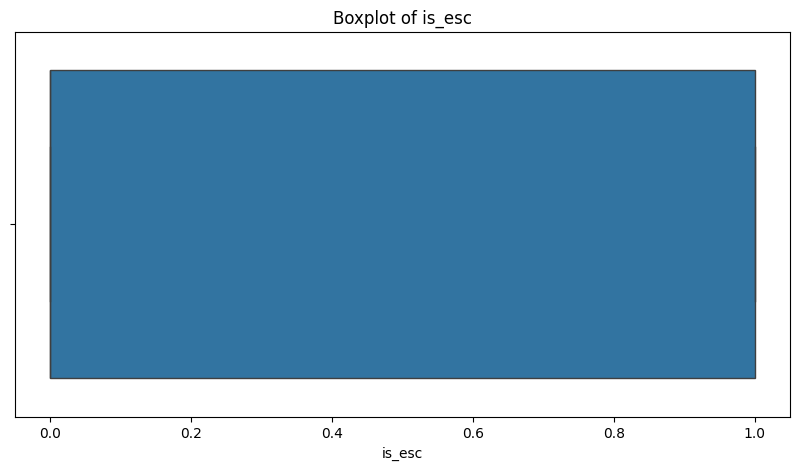

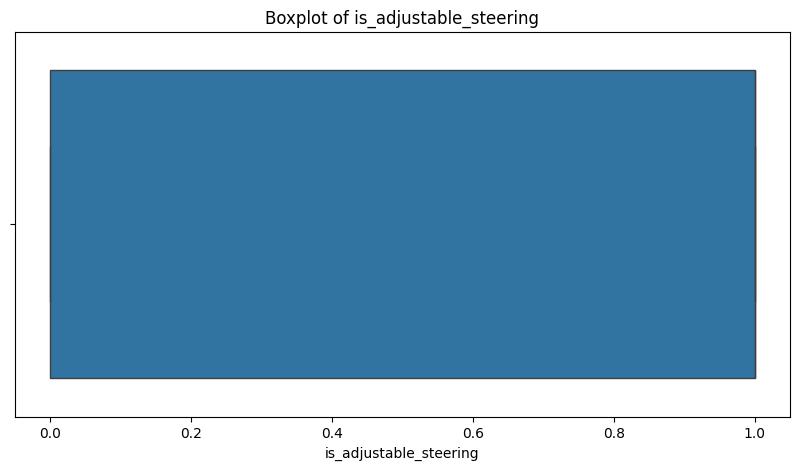

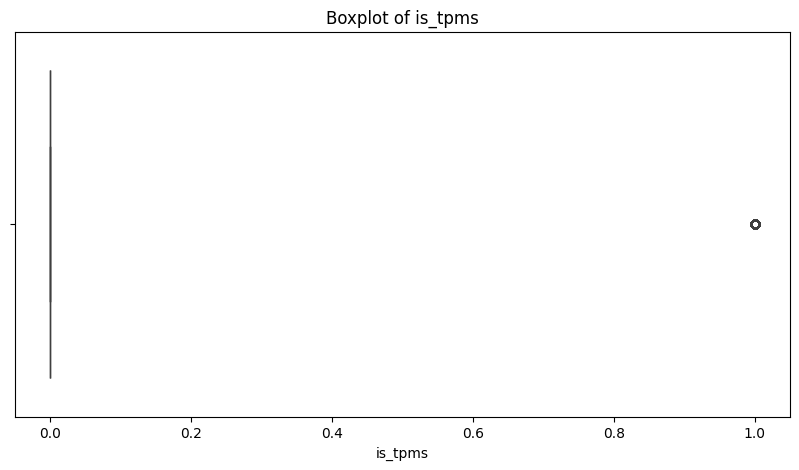

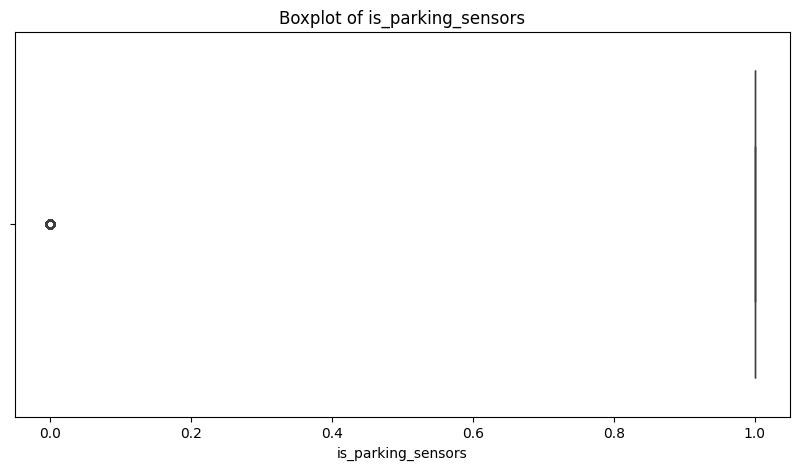

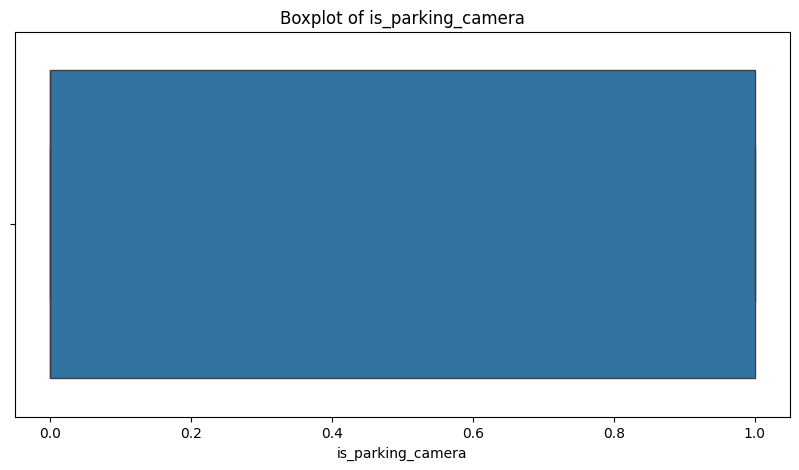

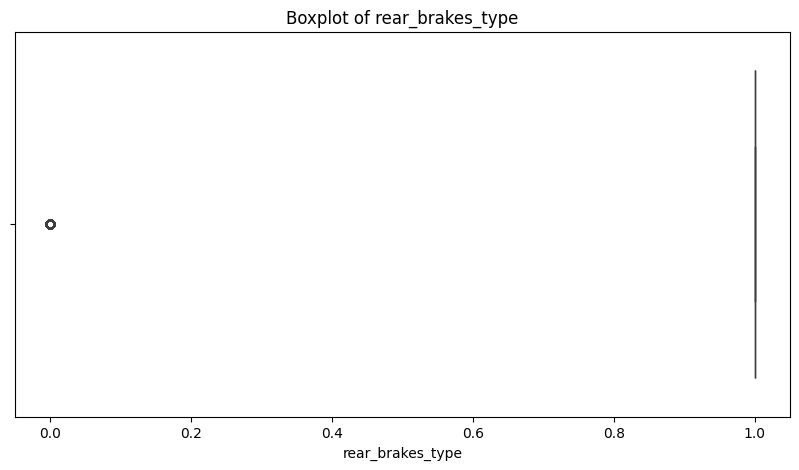

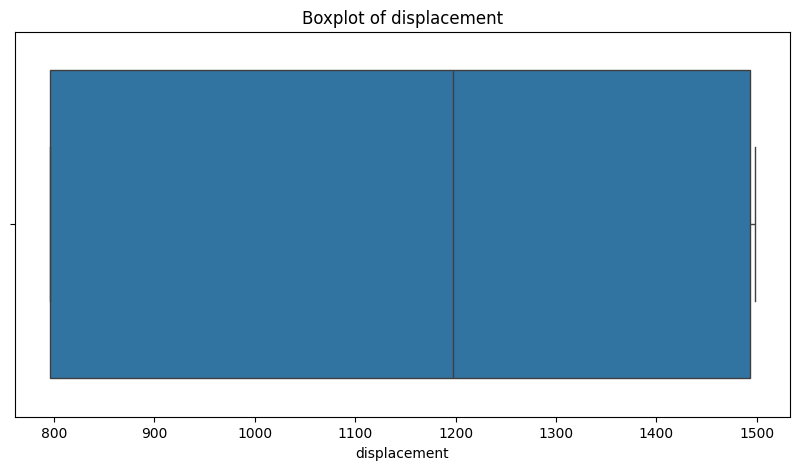

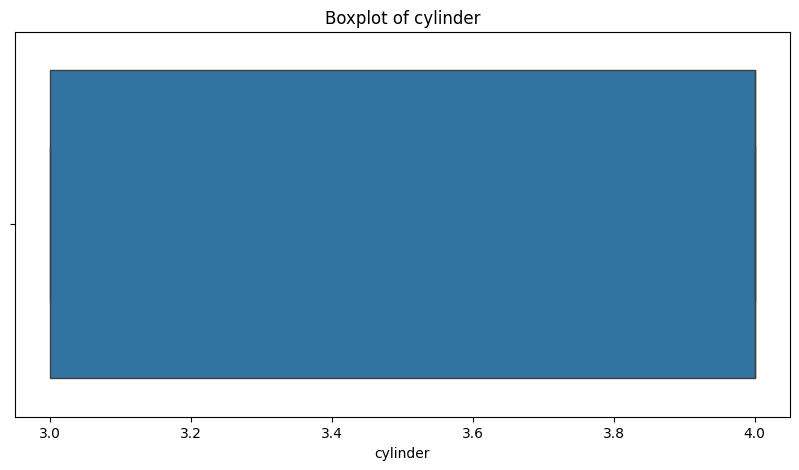

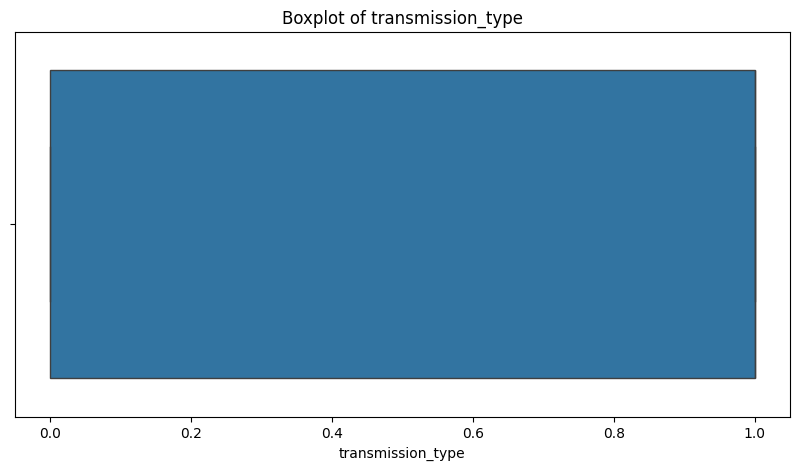

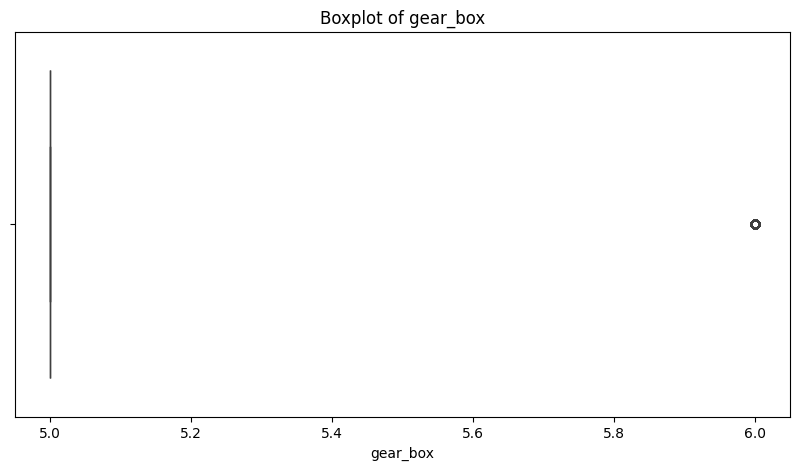

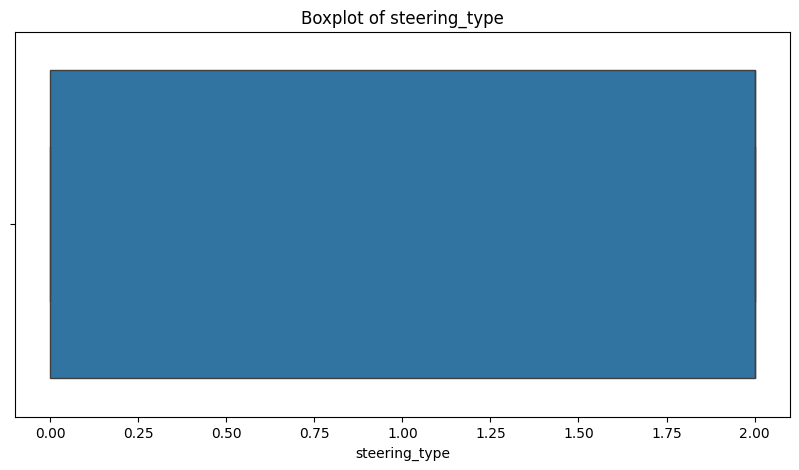

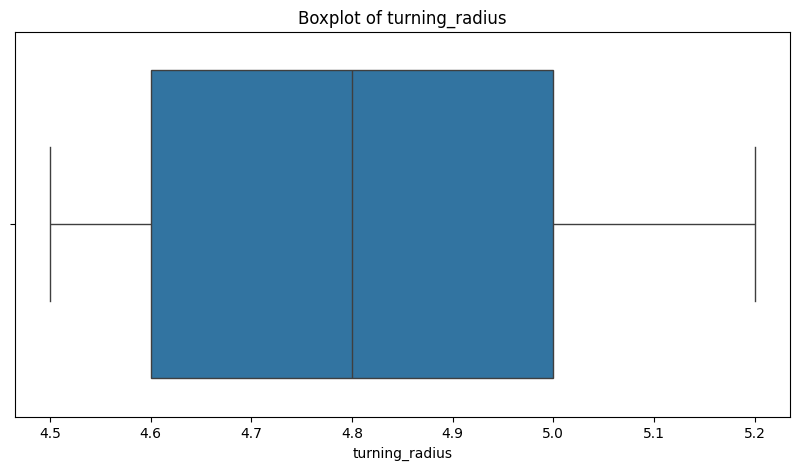

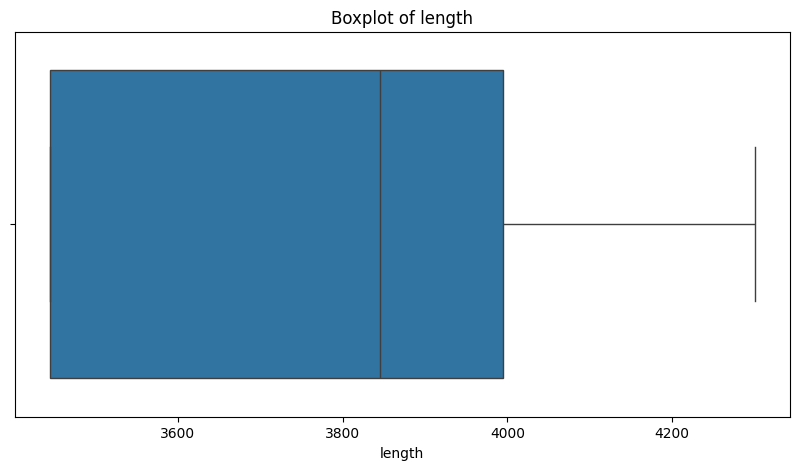

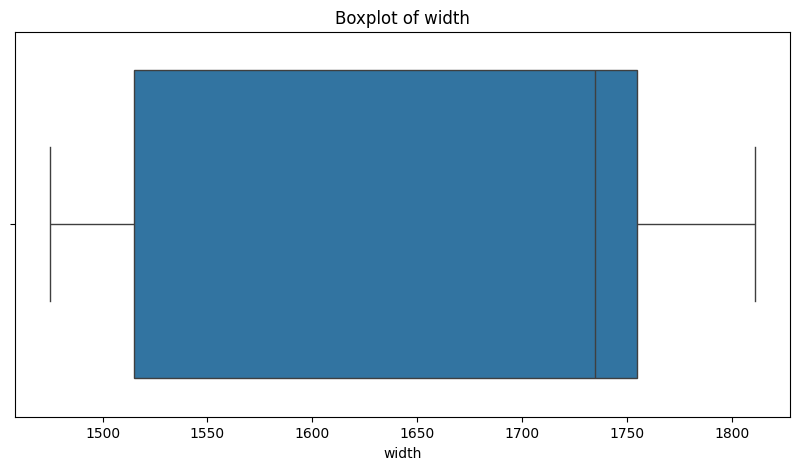

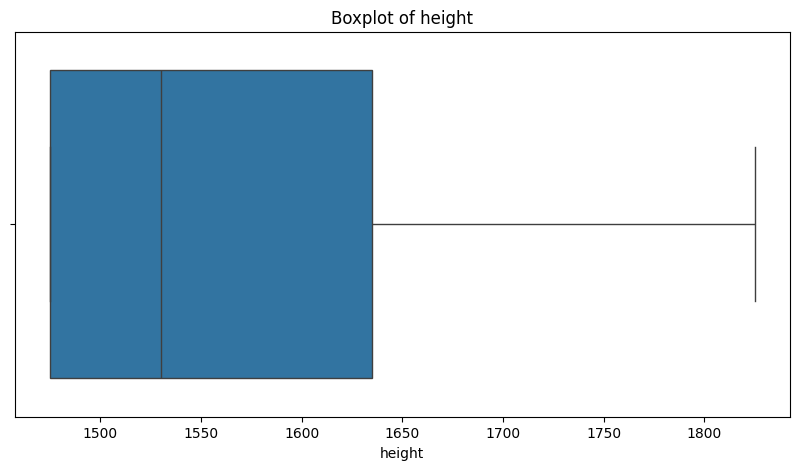

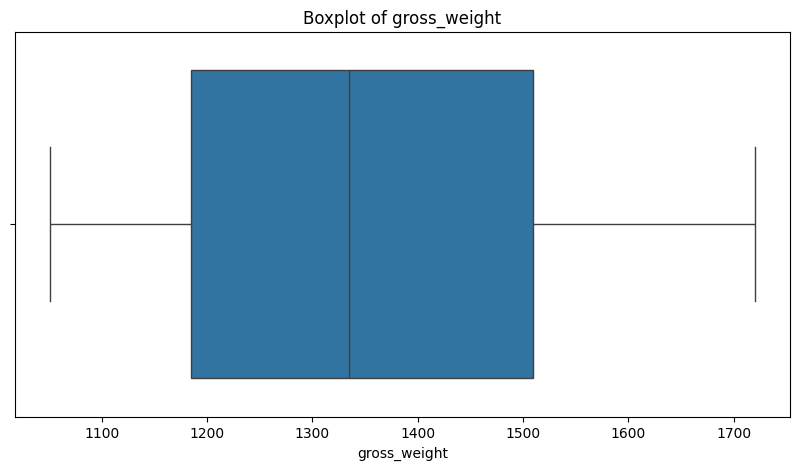

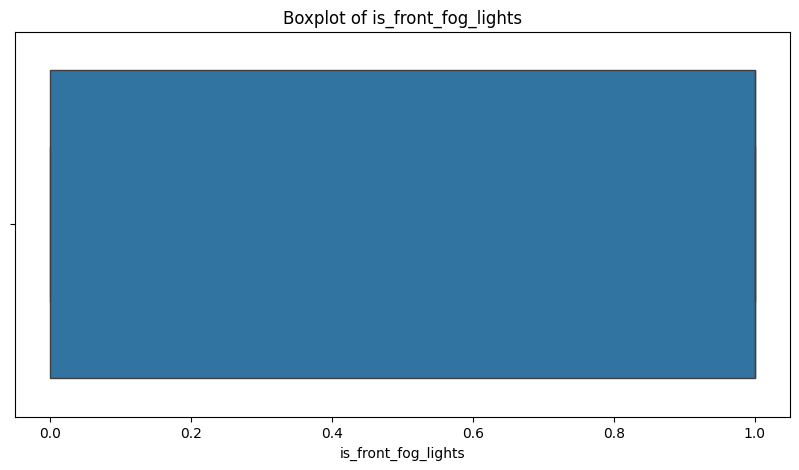

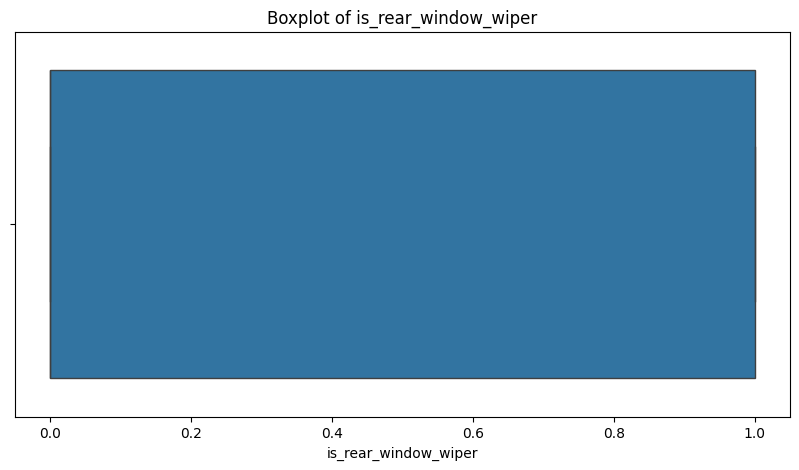

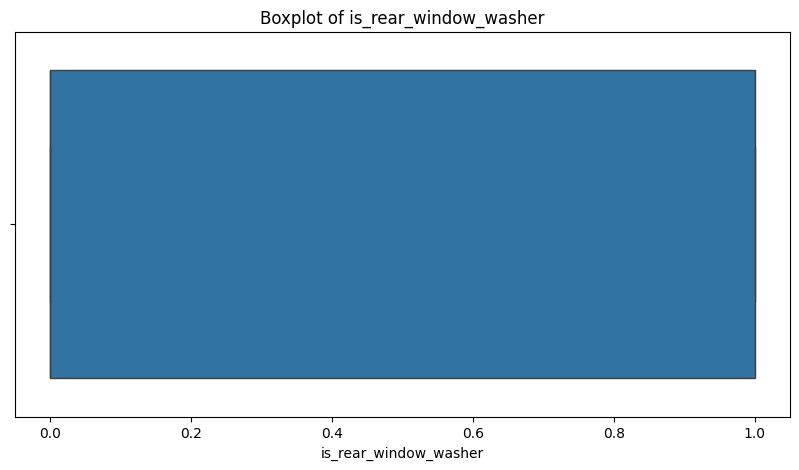

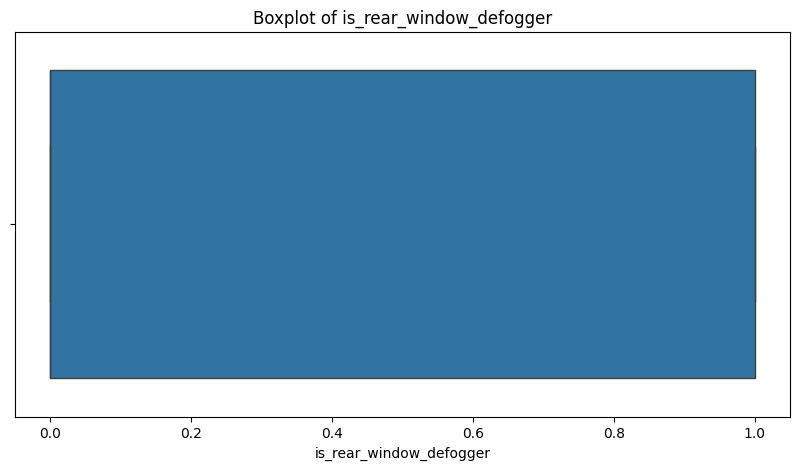

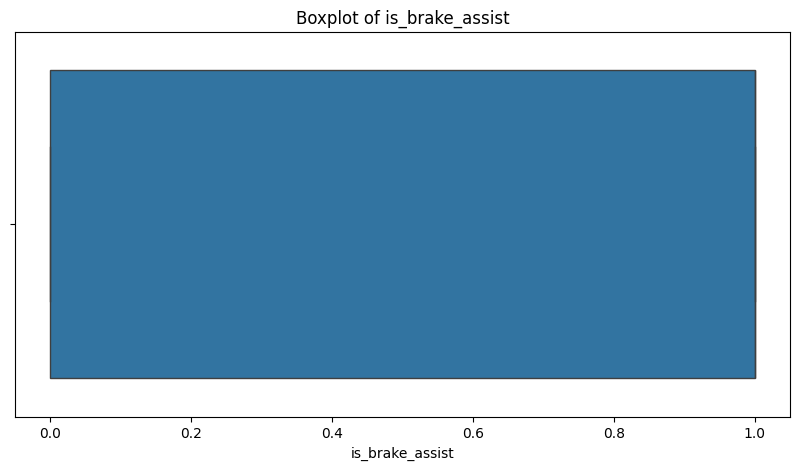

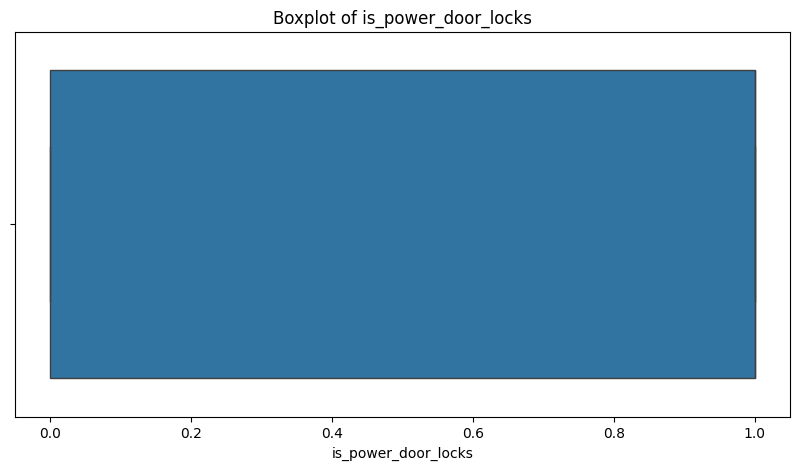

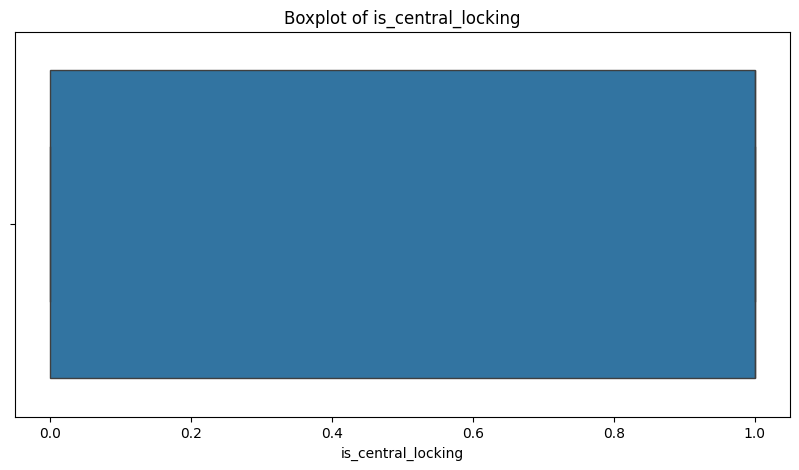

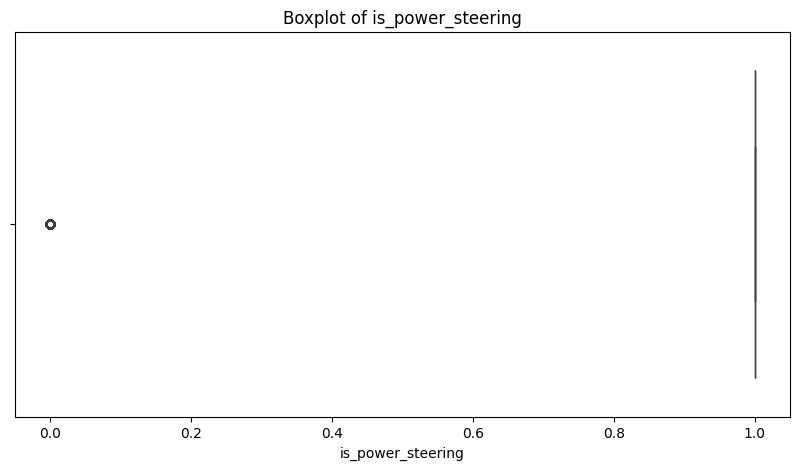

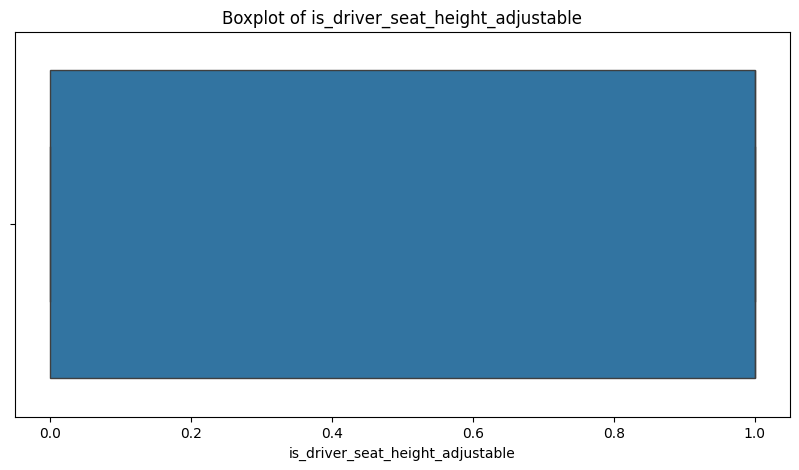

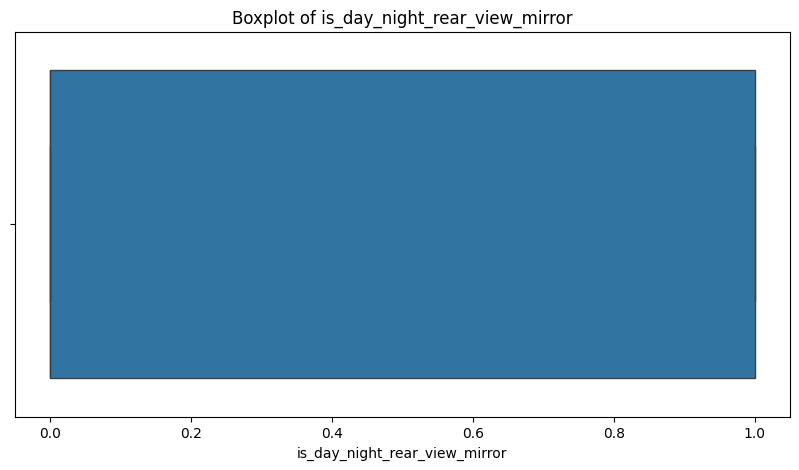

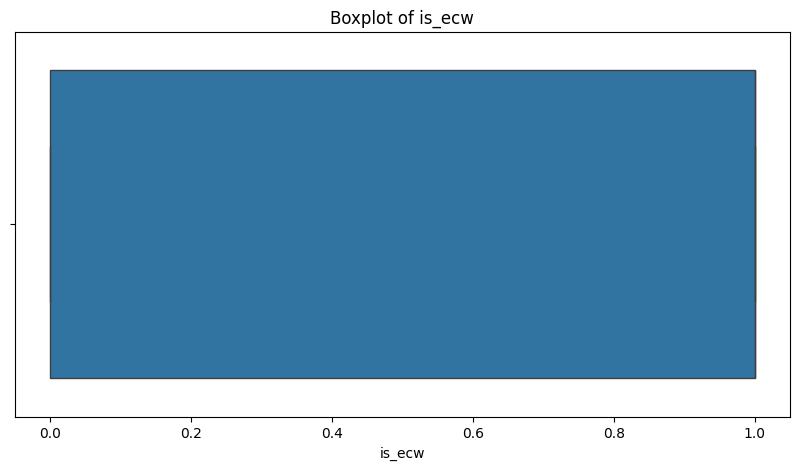

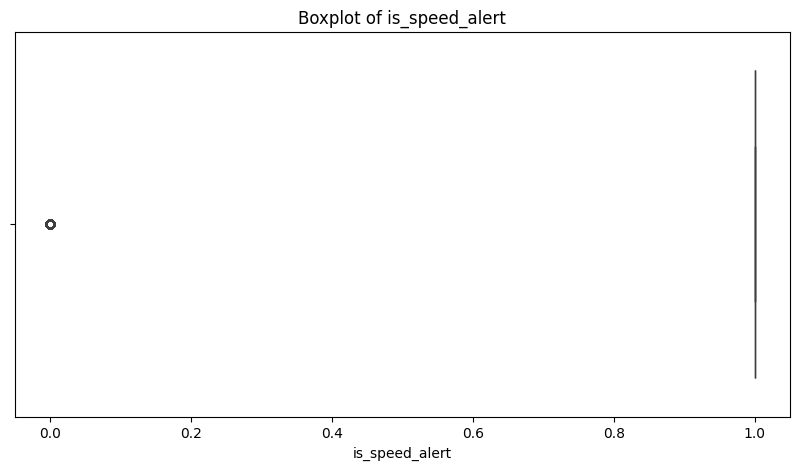

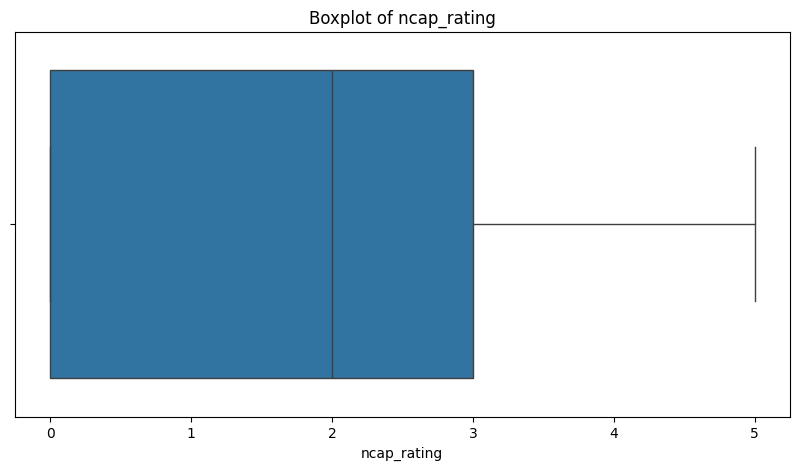

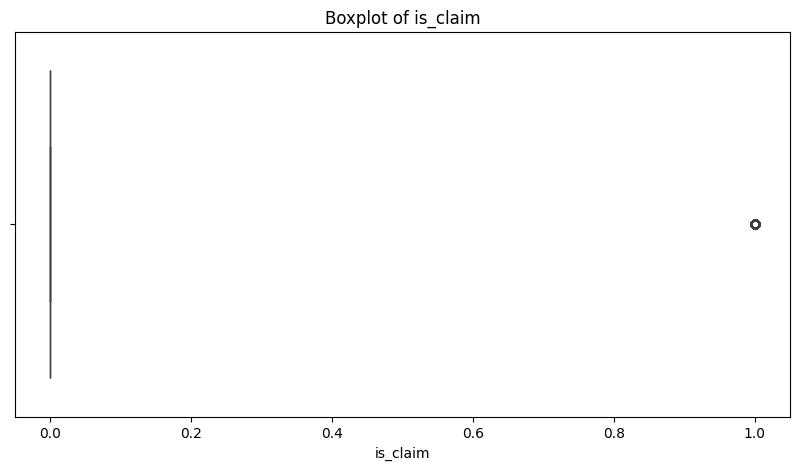

In [23]:
#boxplot to check for outliers in numerical features
numerical_features= train.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
    

box plot help understand utliers and we can see some columns doesnt have outlier while others have 2 values only only some columns have some outliers

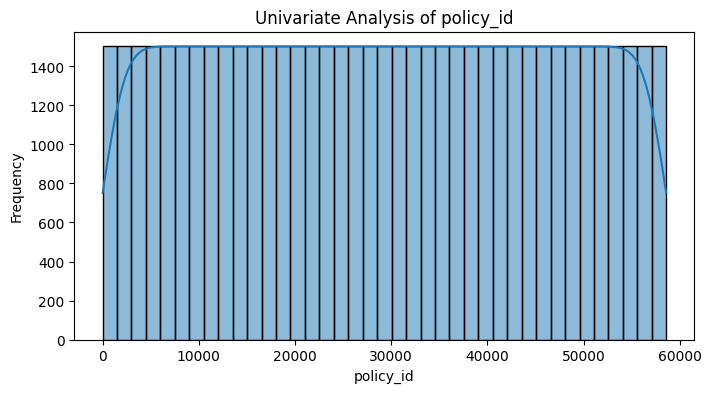

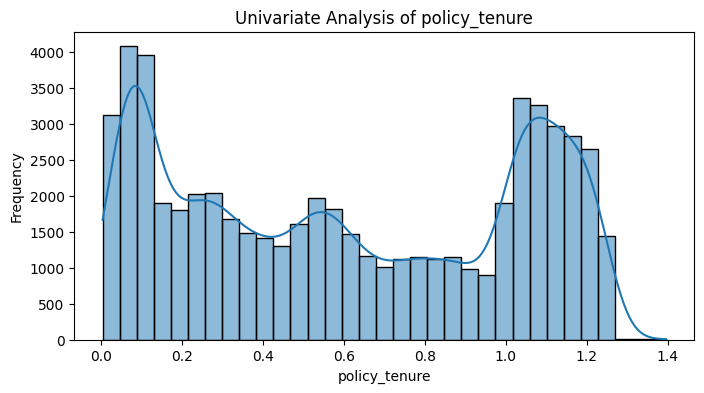

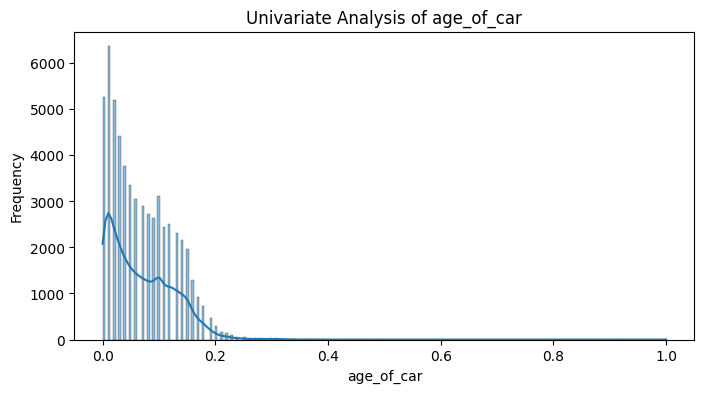

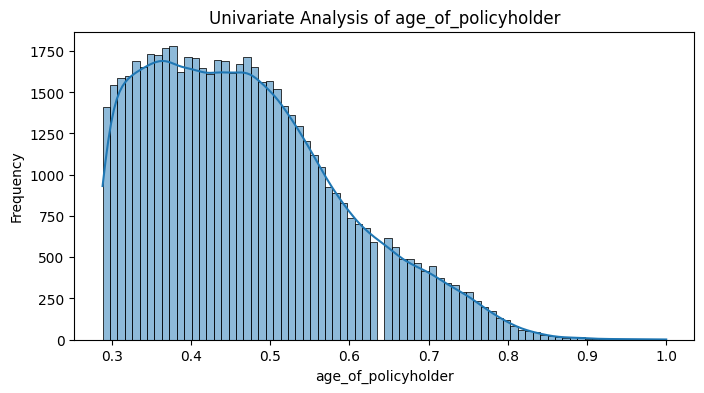

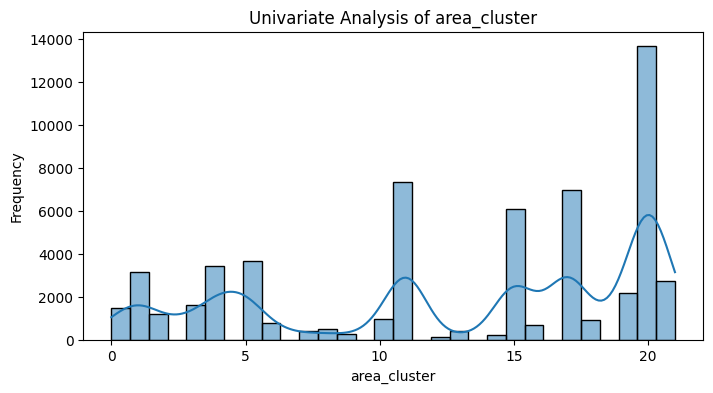

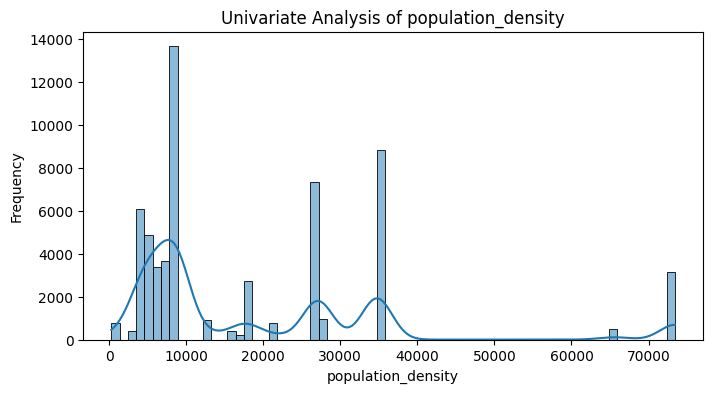

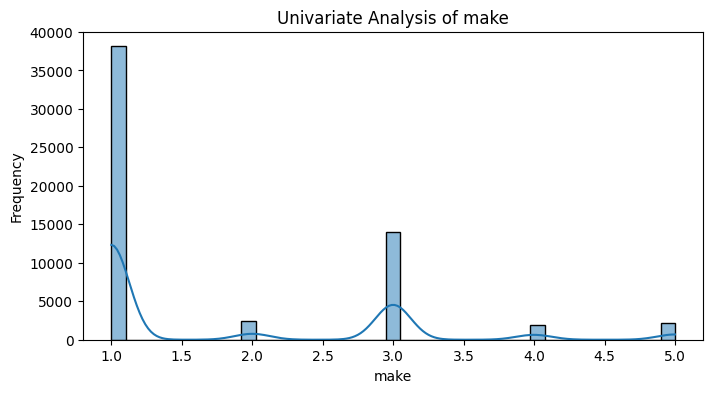

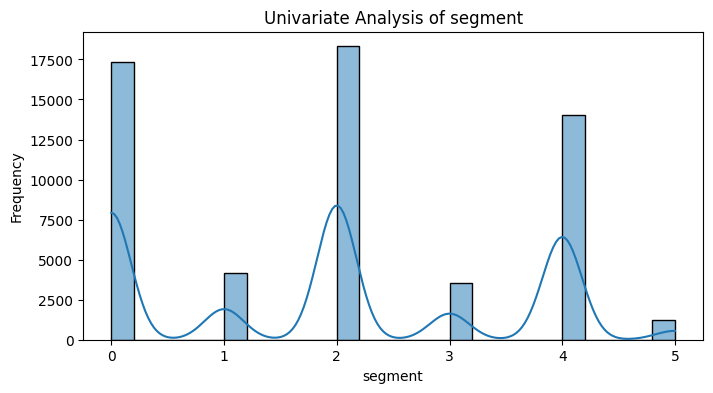

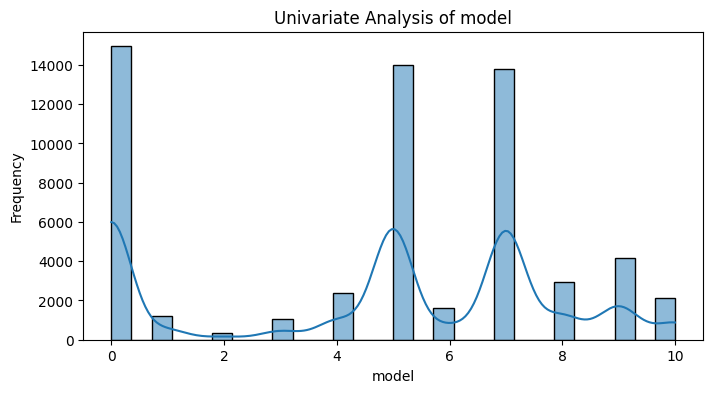

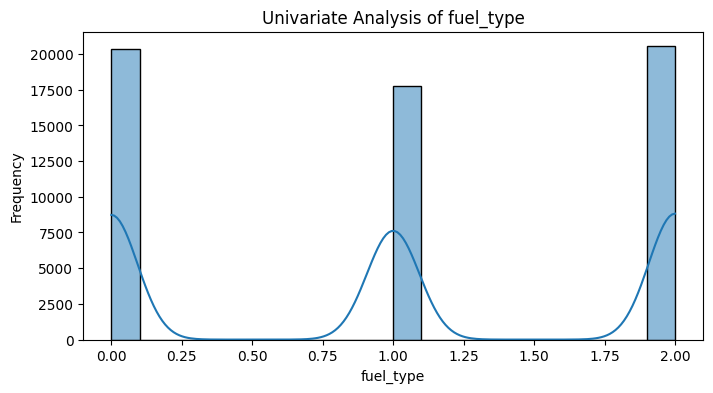

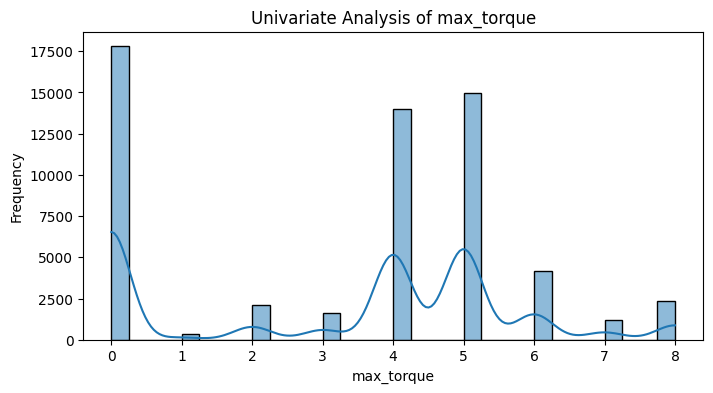

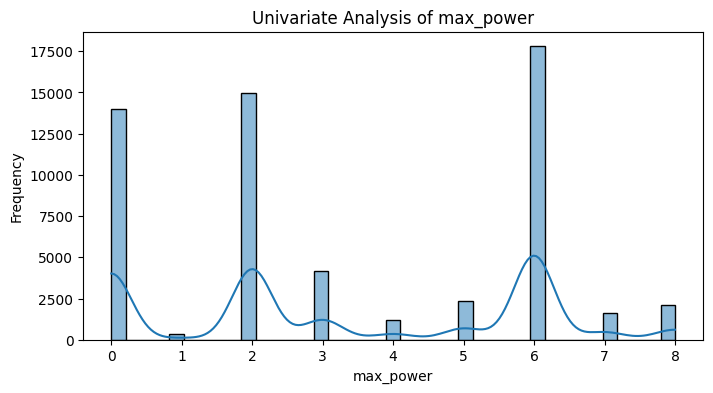

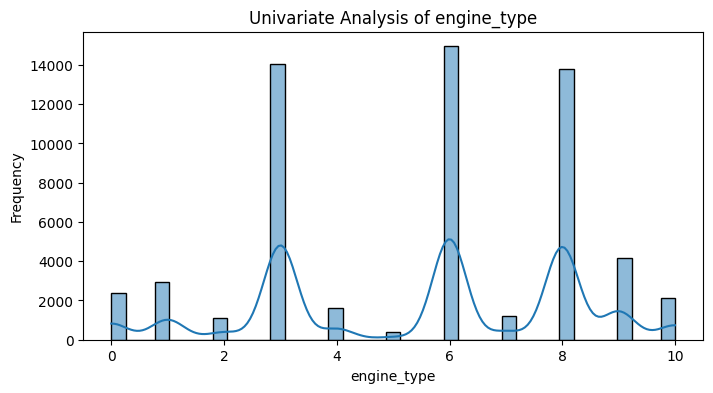

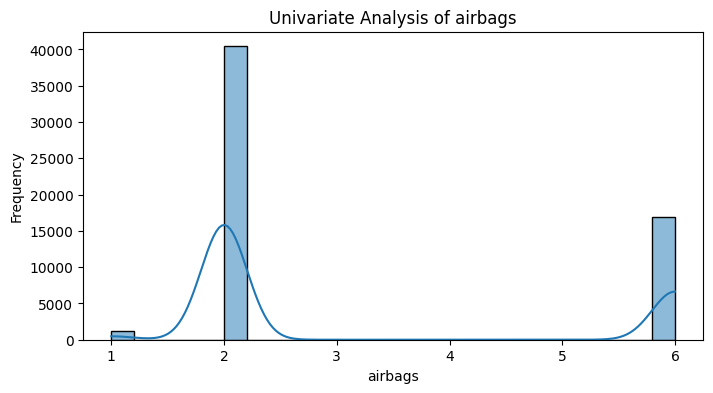

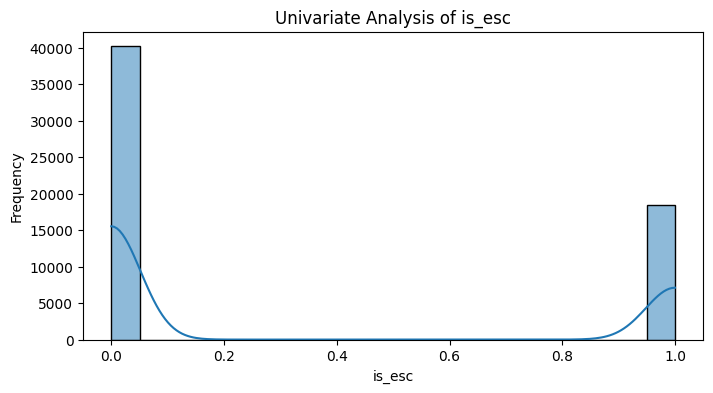

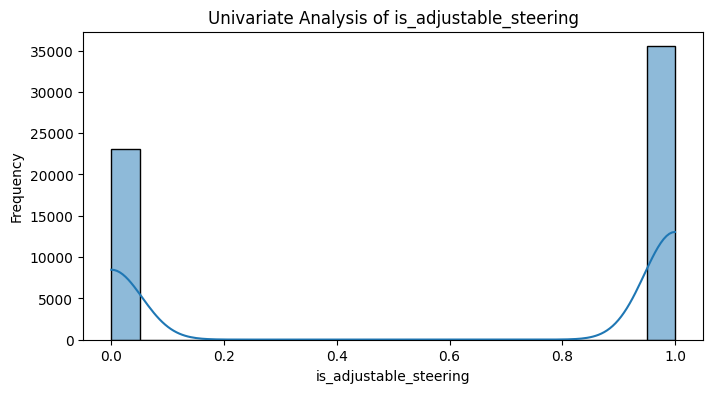

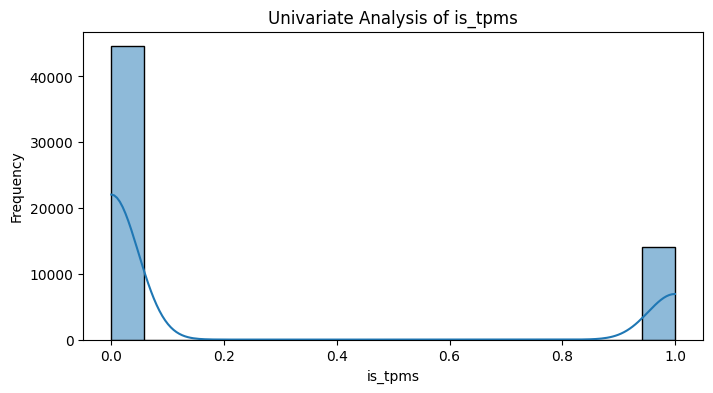

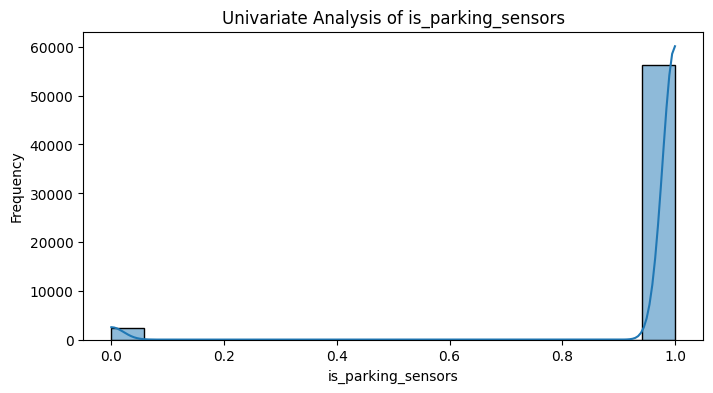

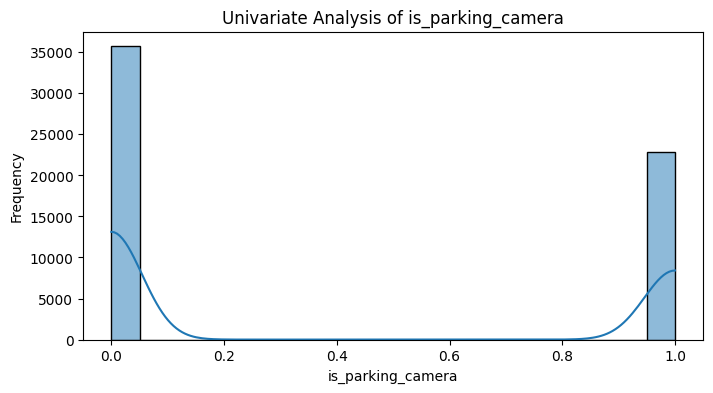

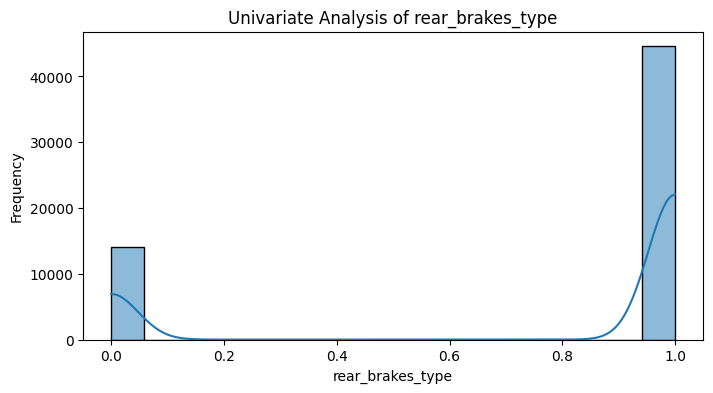

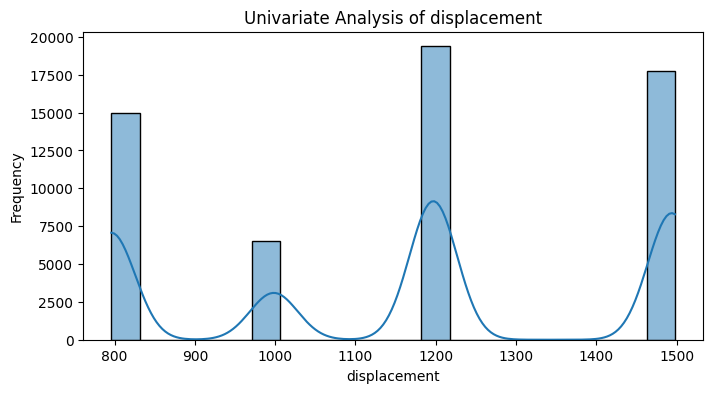

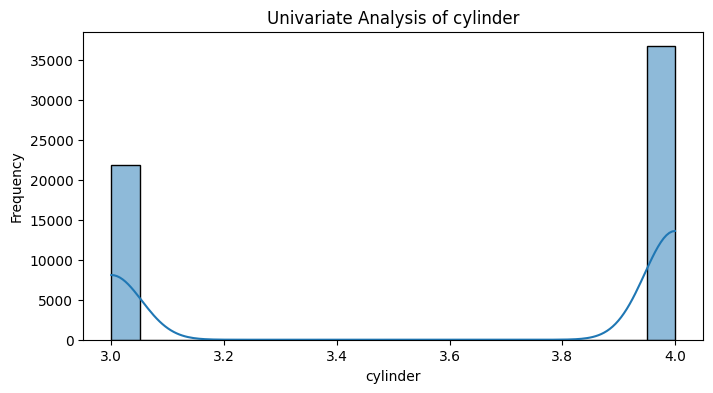

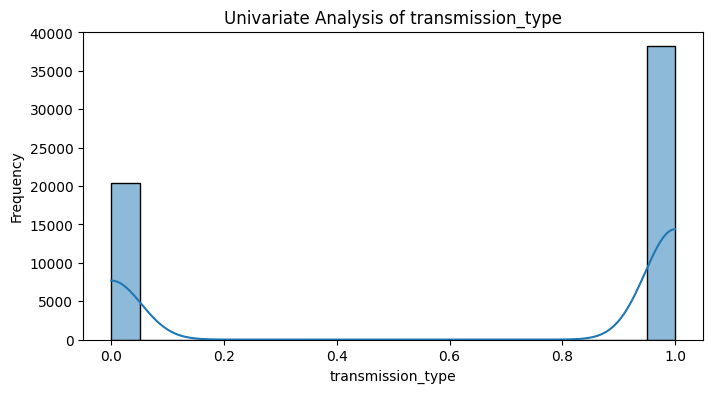

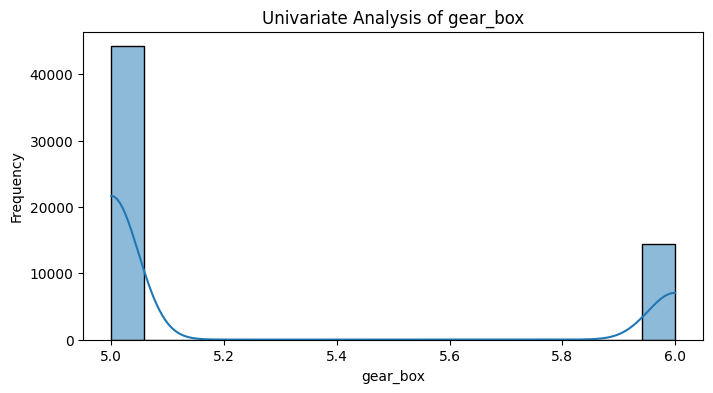

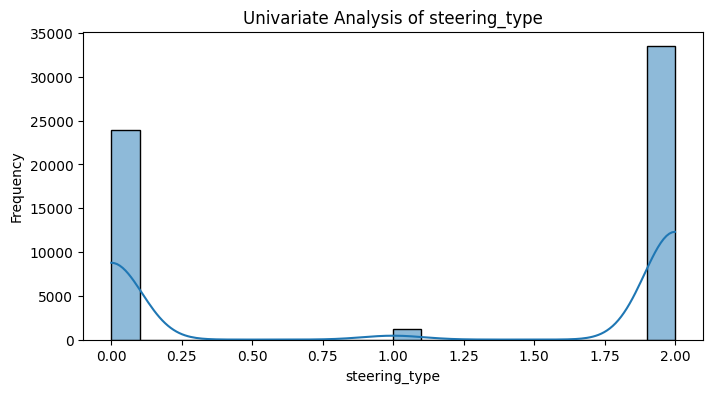

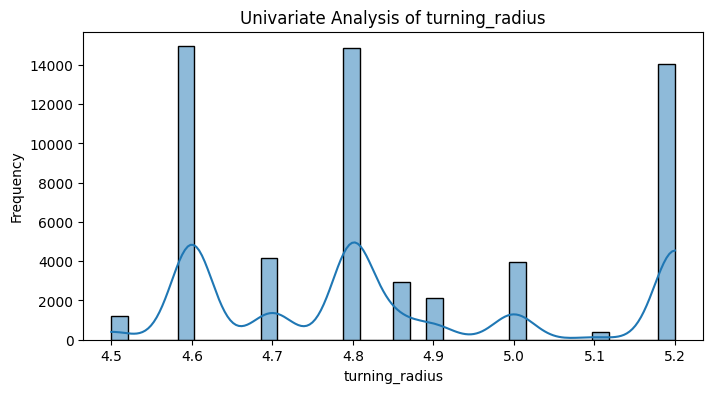

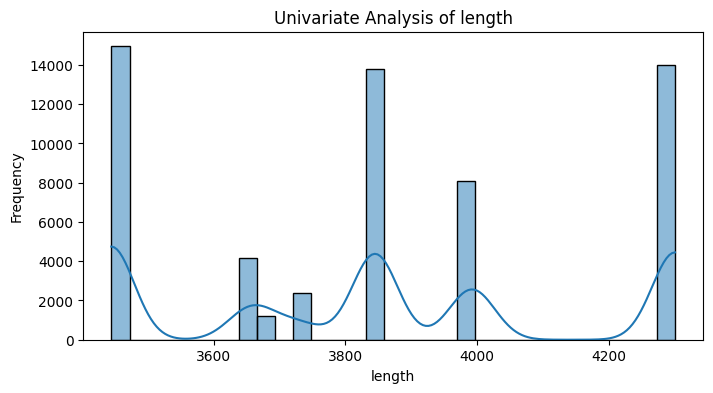

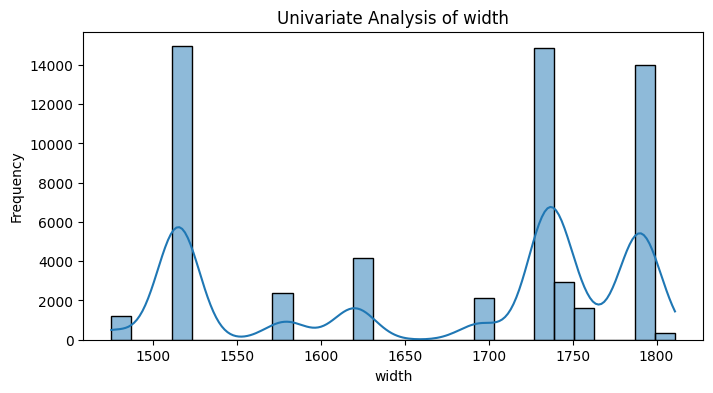

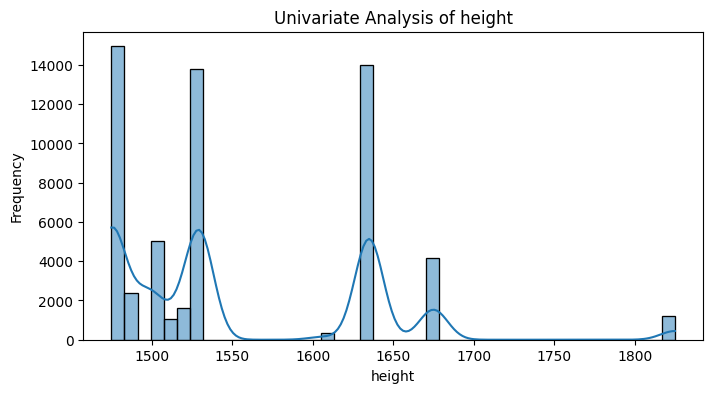

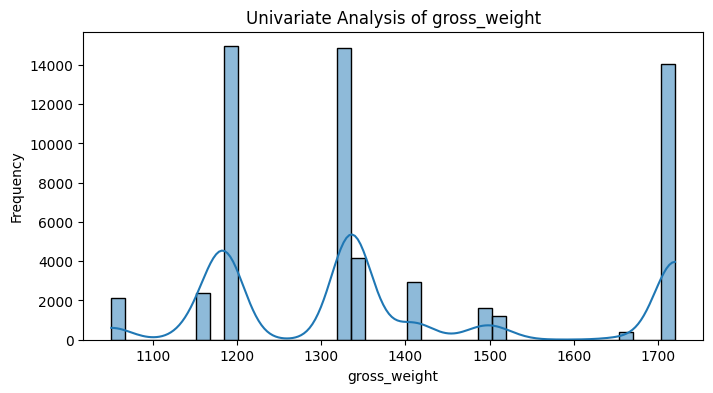

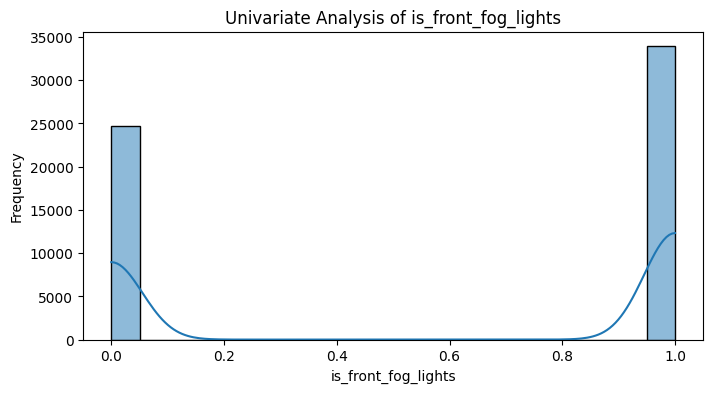

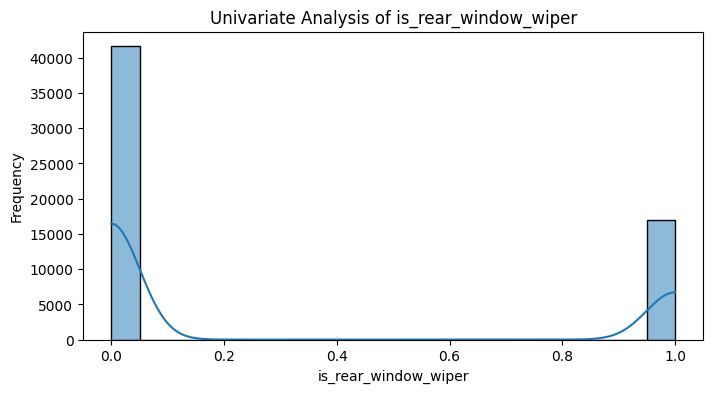

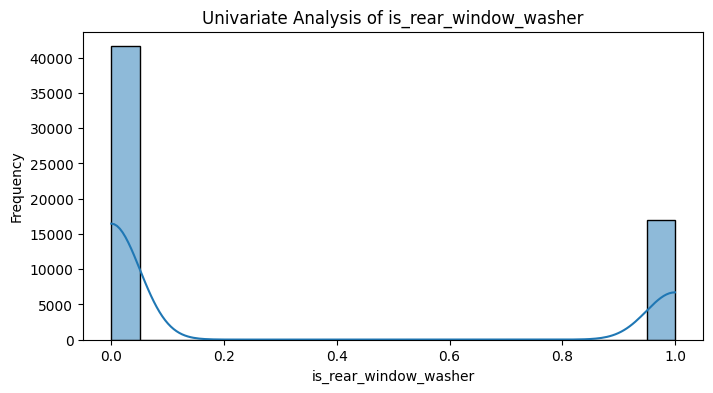

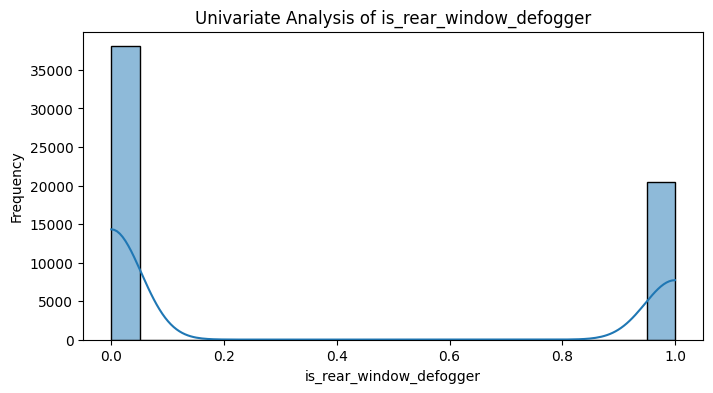

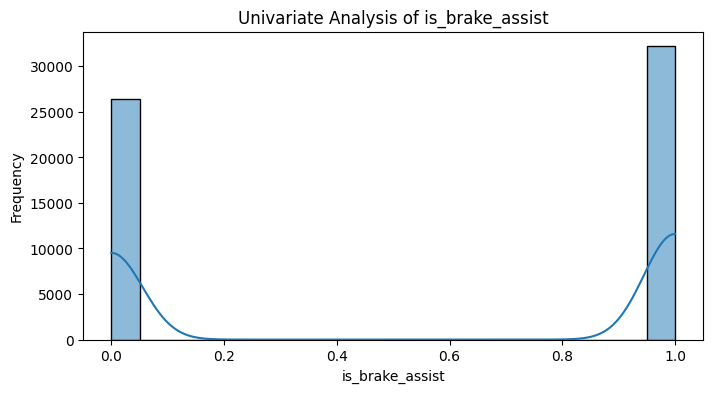

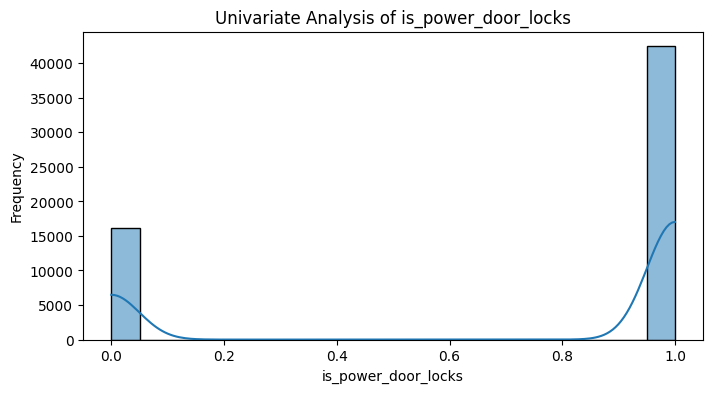

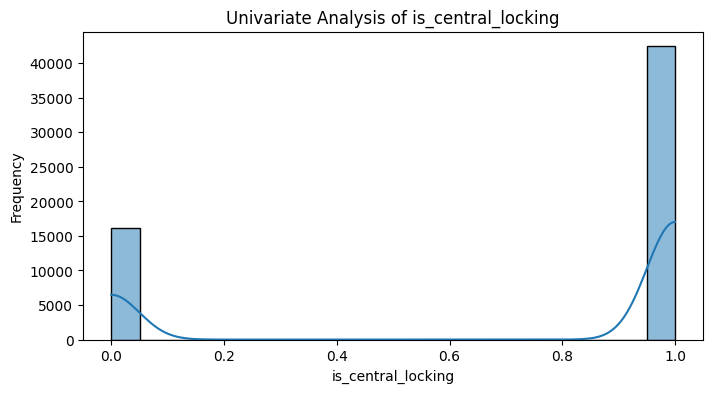

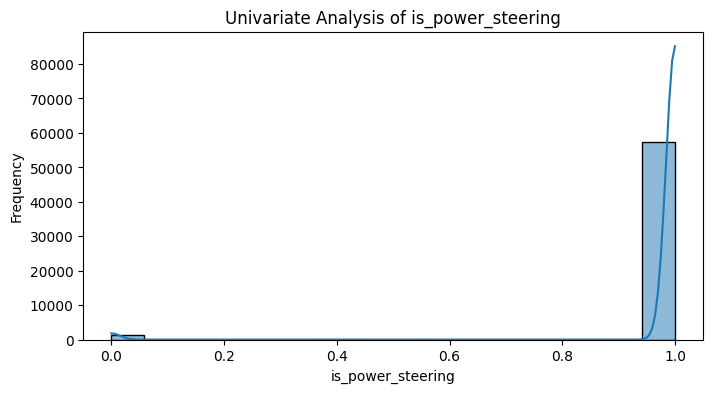

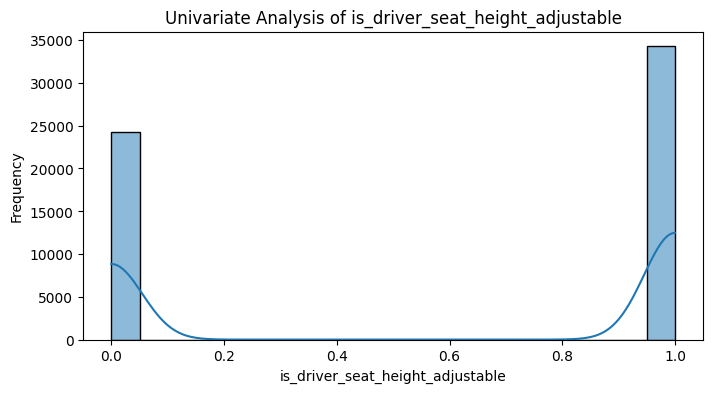

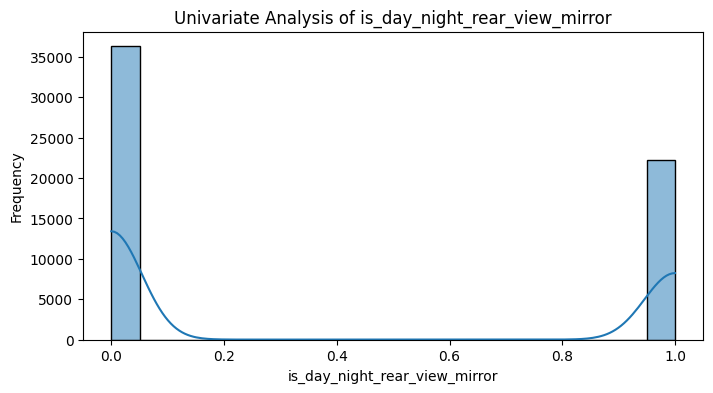

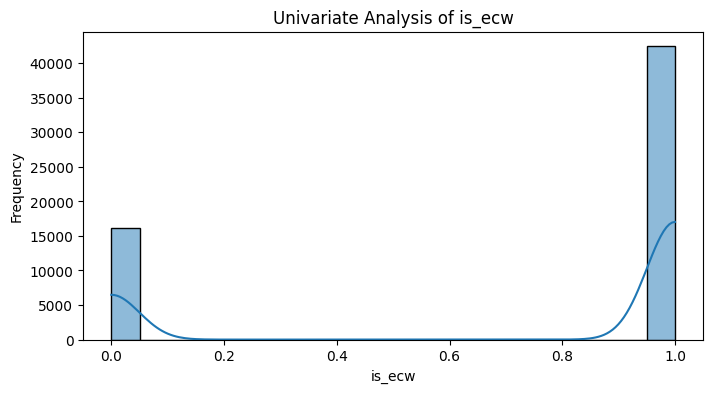

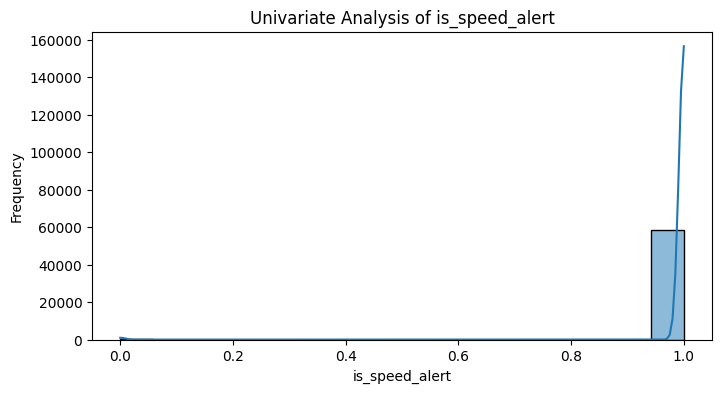

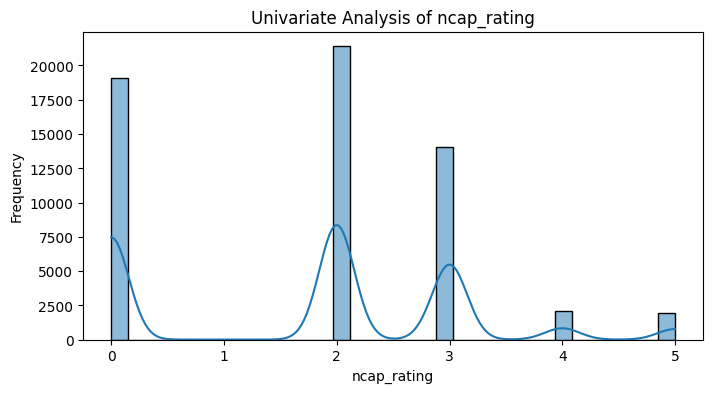

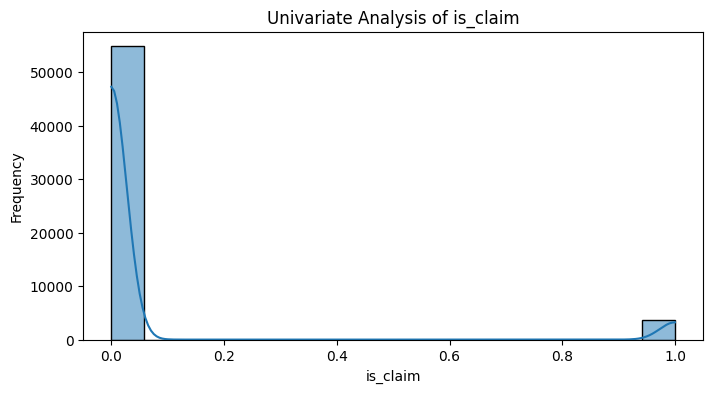

In [24]:
#univarient analysis
#
import seaborn as sns
for column in train.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(train[column], kde=True)
    plt.title(f'Univariate Analysis of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
#!/usr/bin/env python3

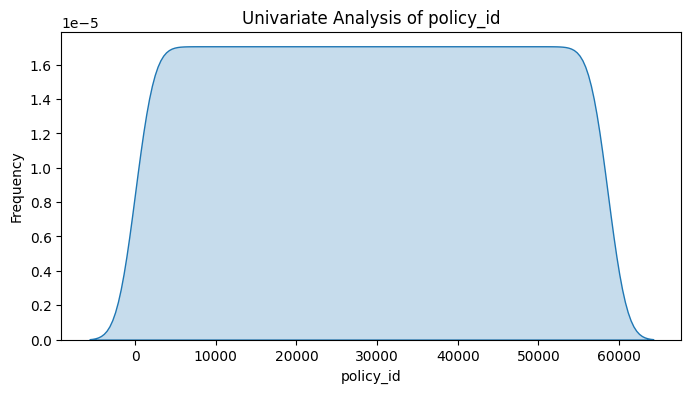

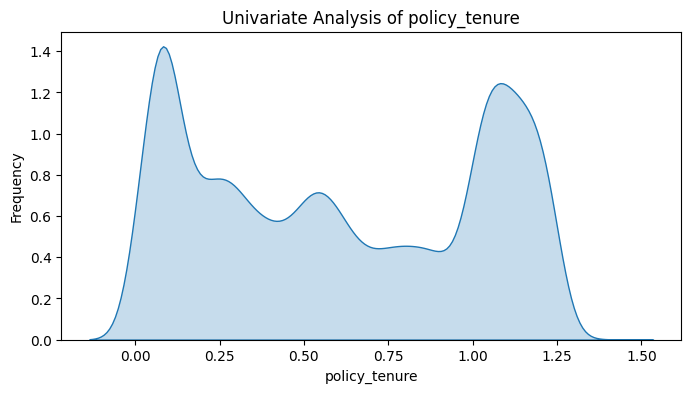

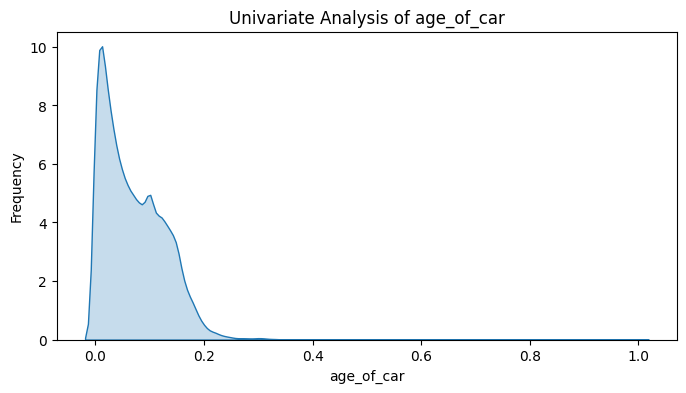

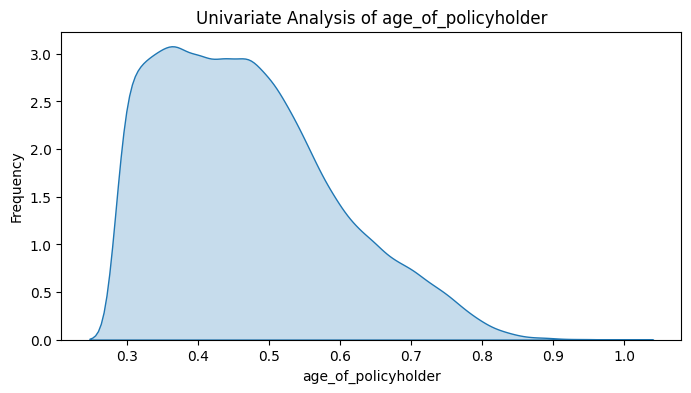

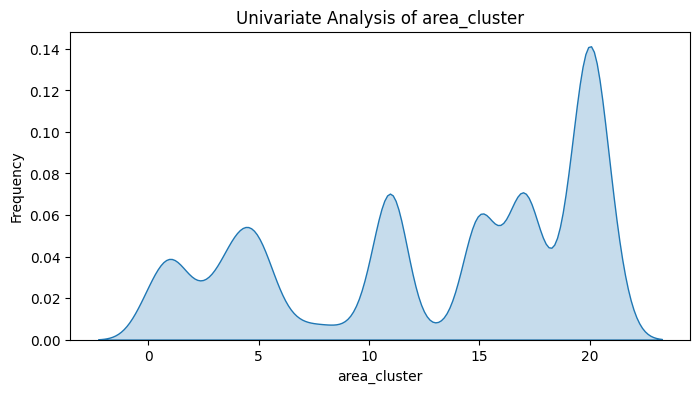

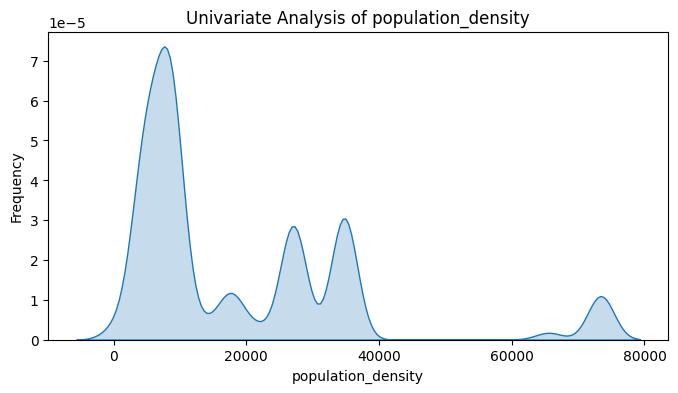

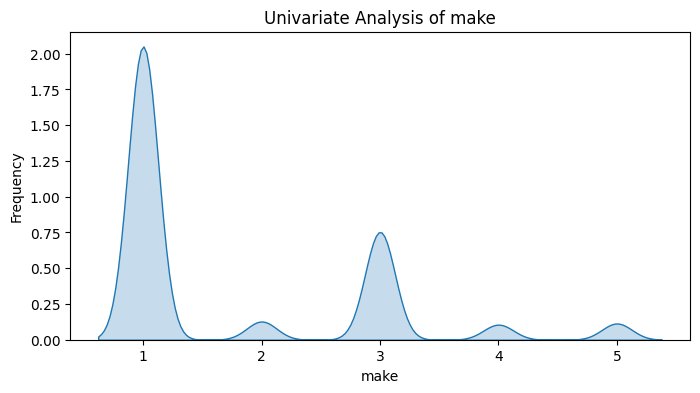

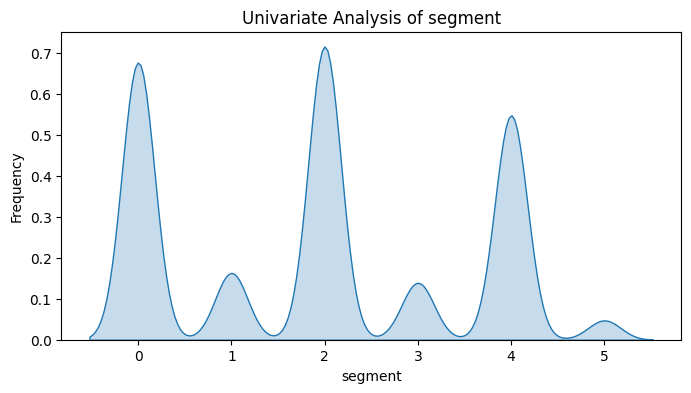

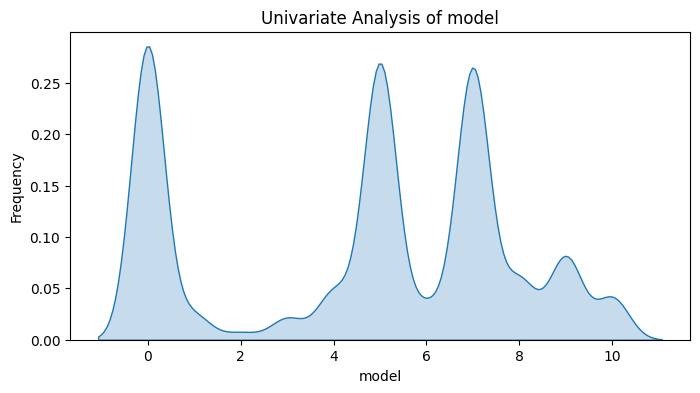

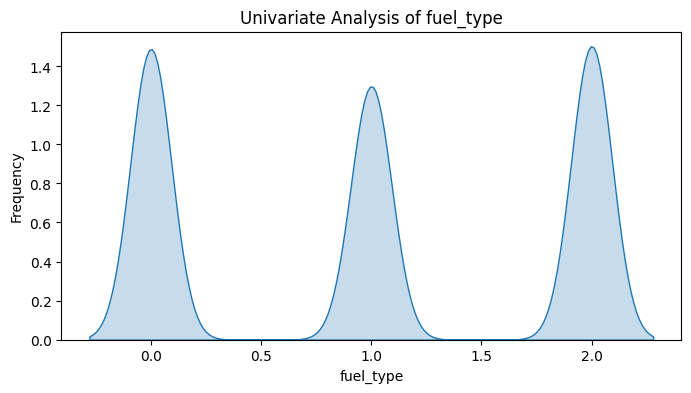

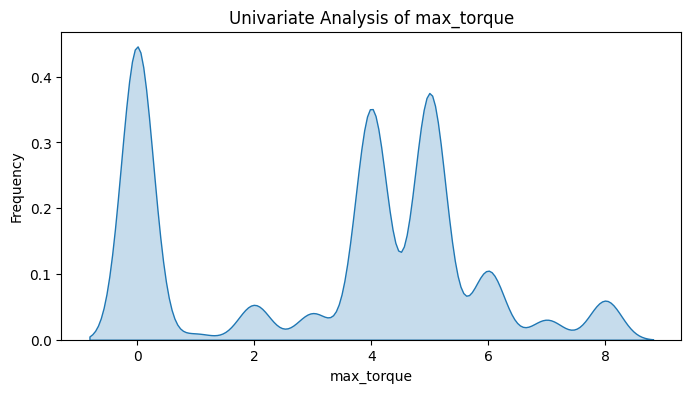

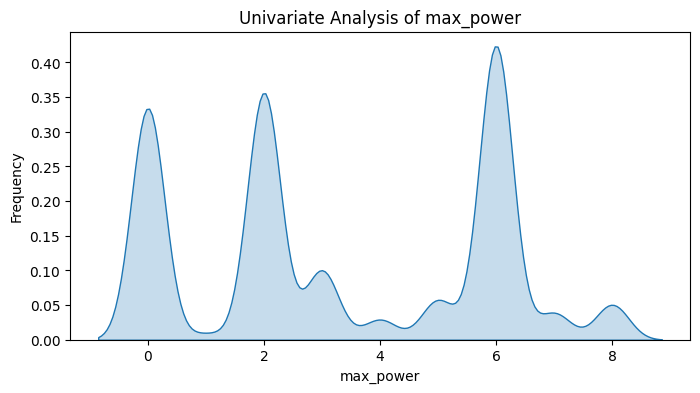

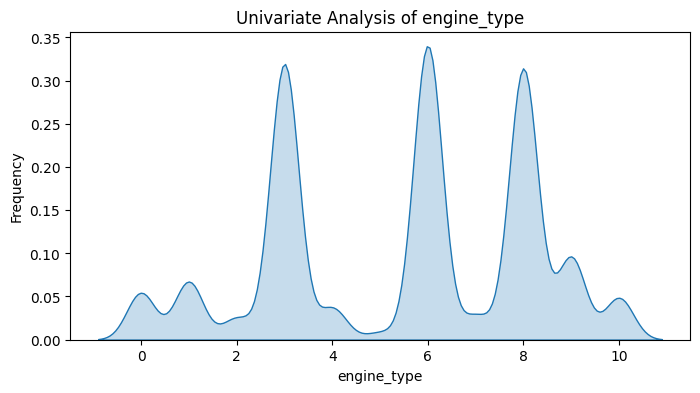

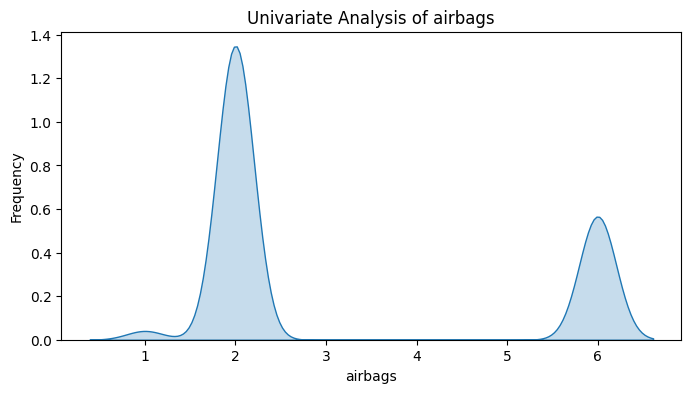

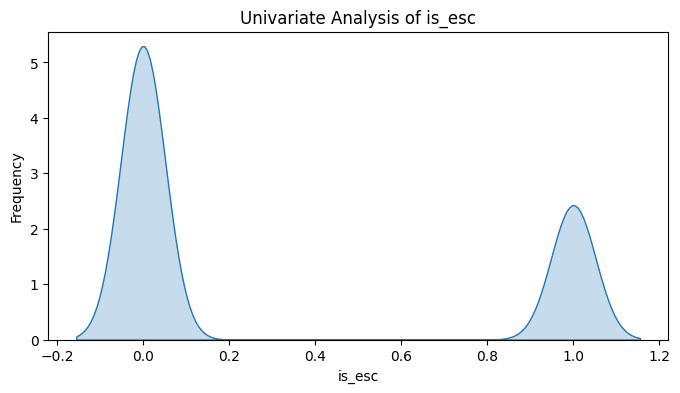

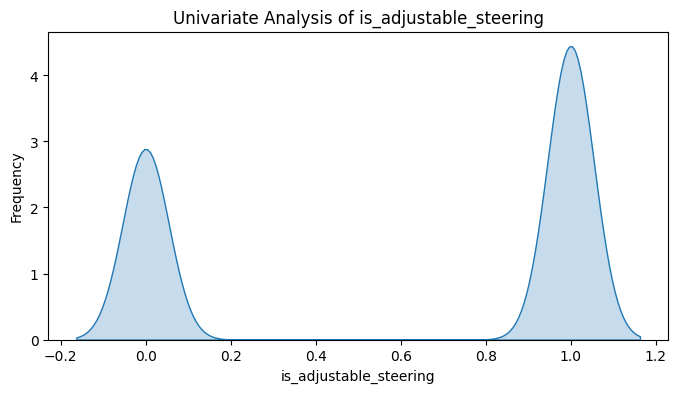

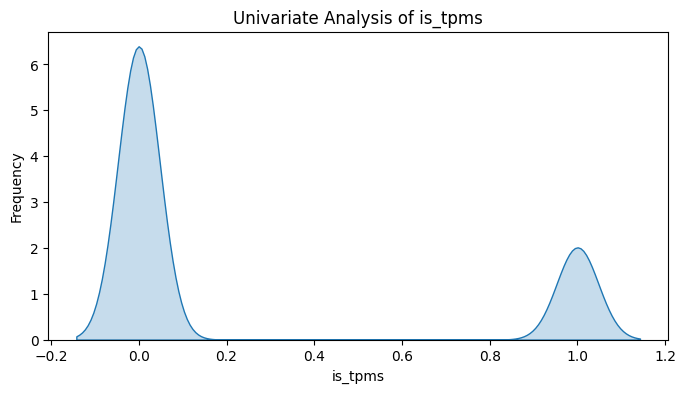

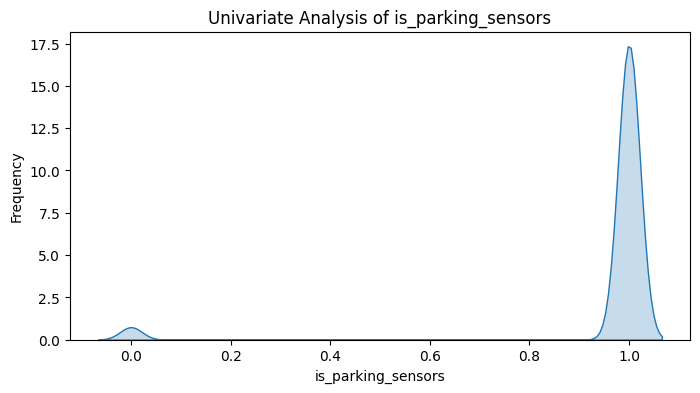

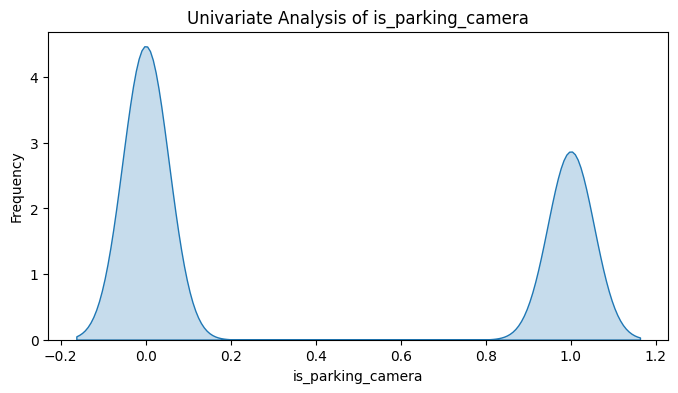

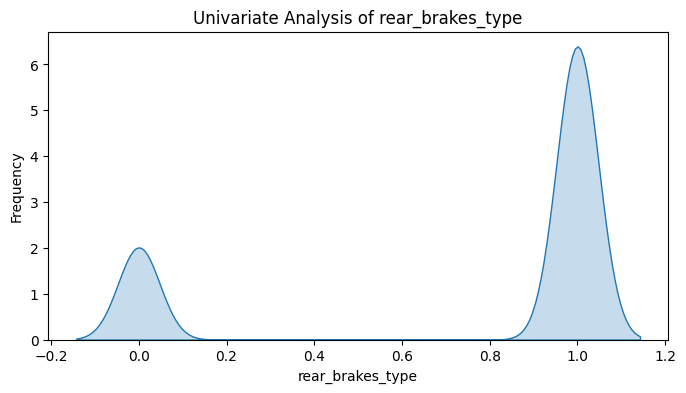

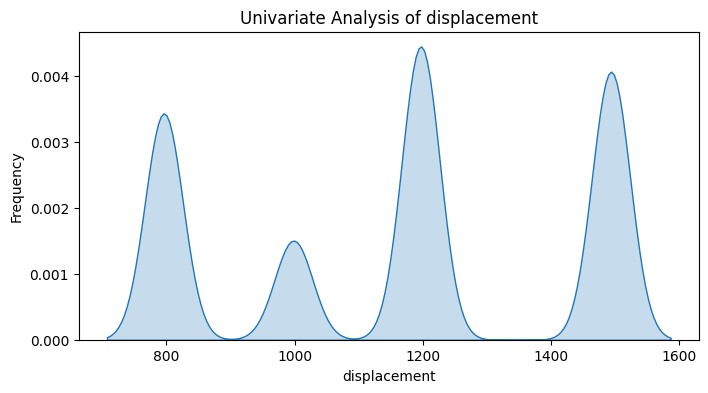

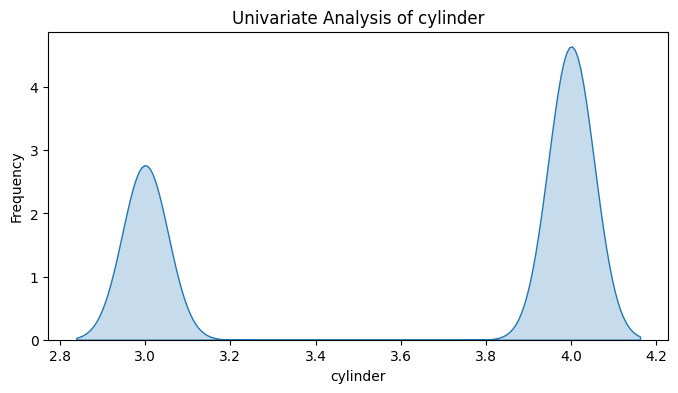

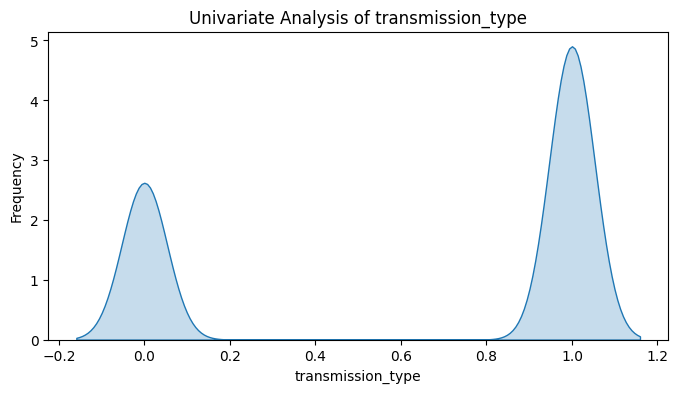

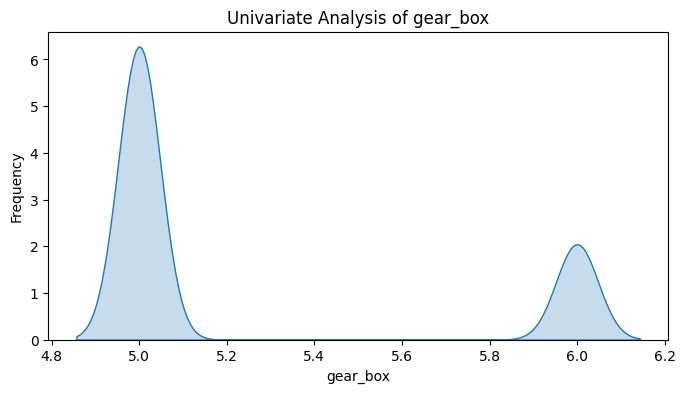

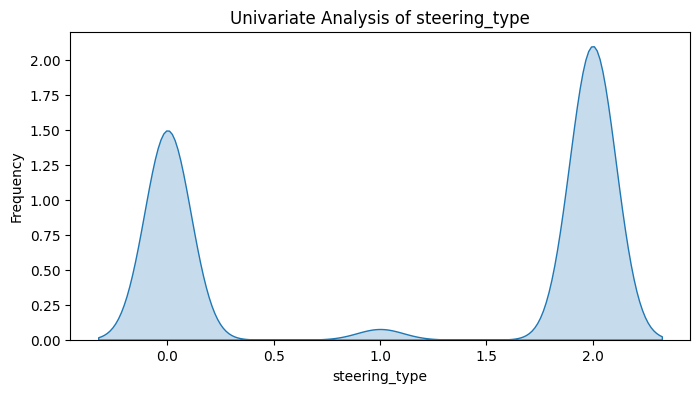

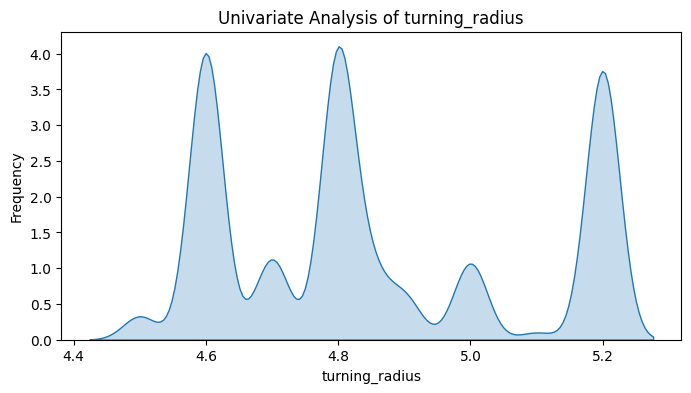

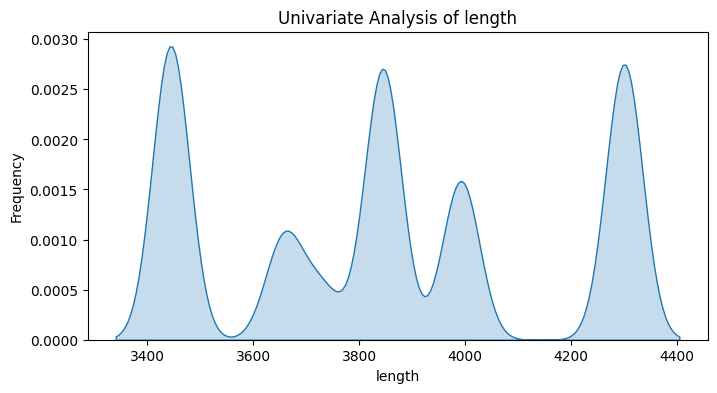

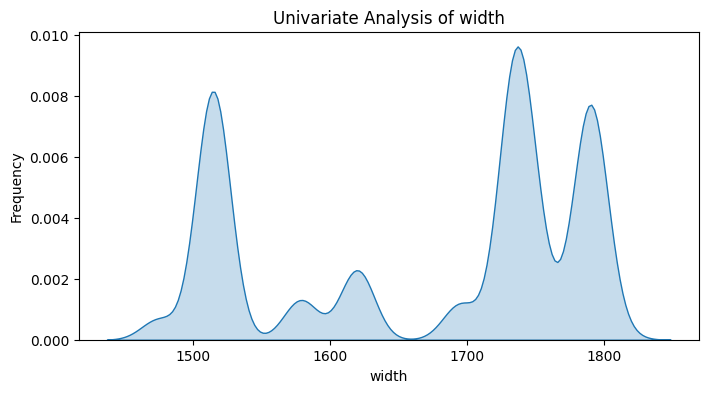

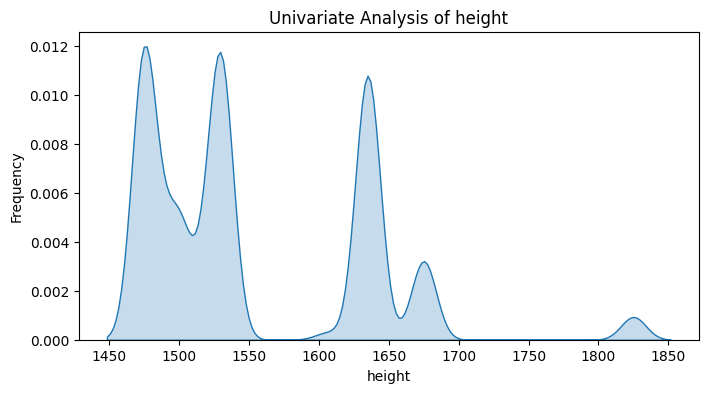

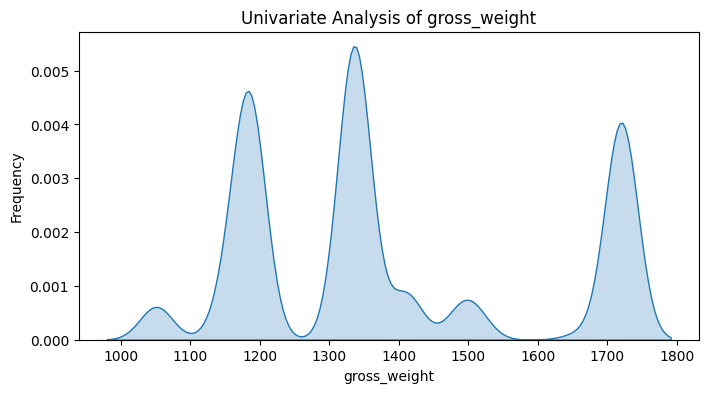

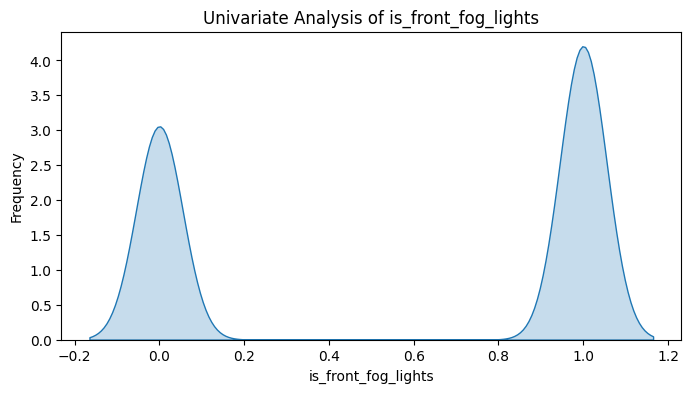

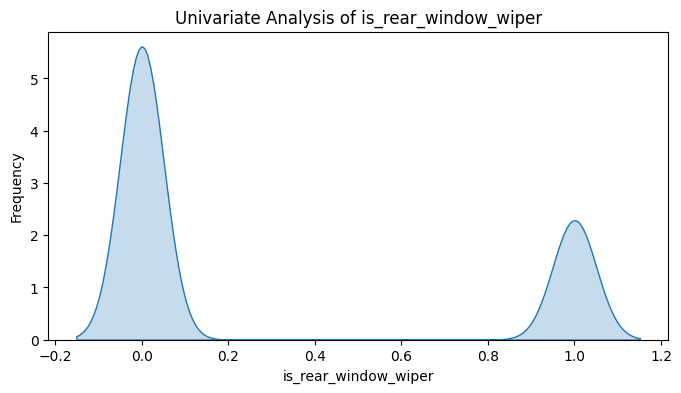

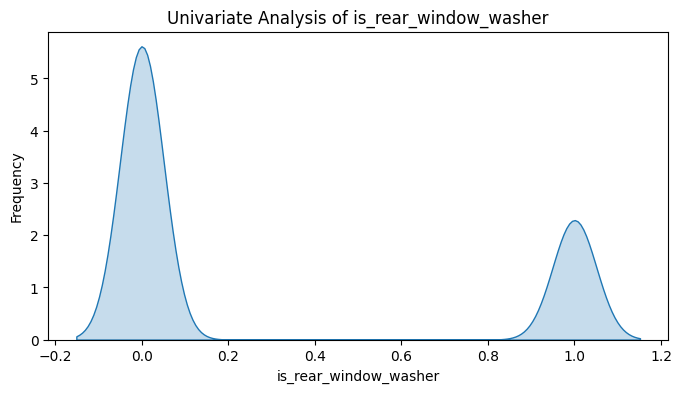

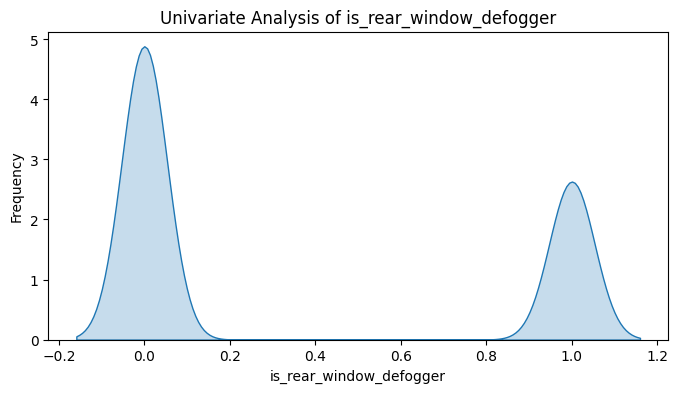

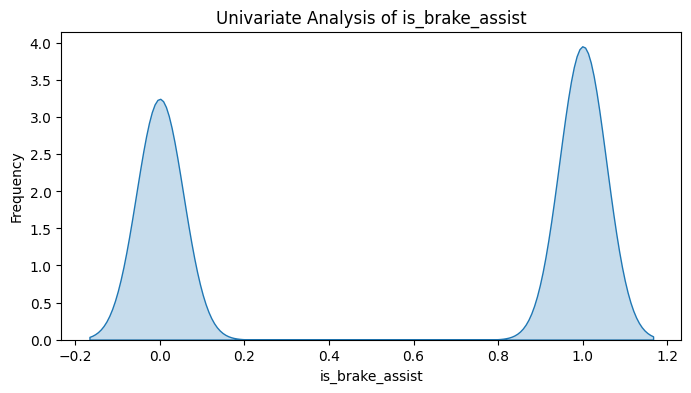

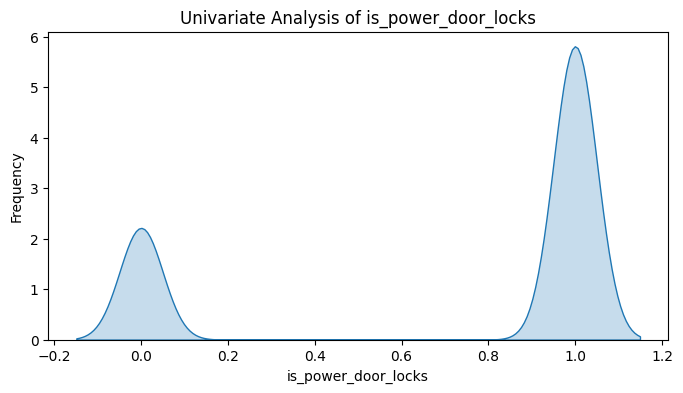

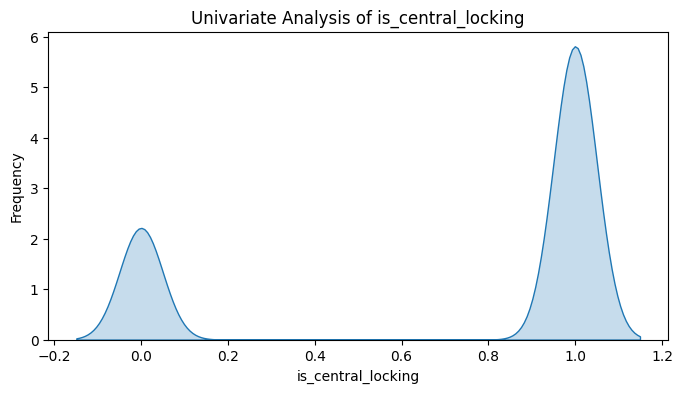

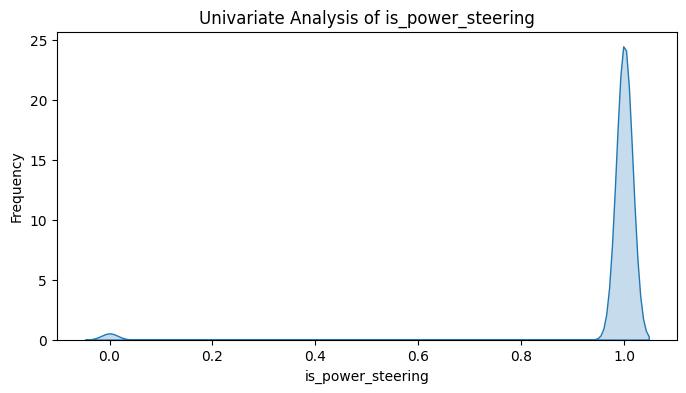

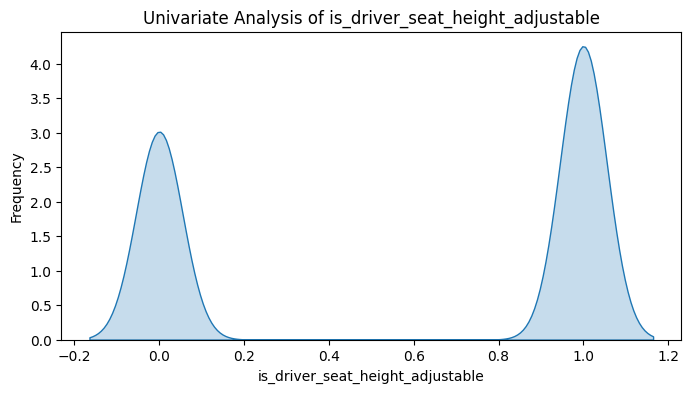

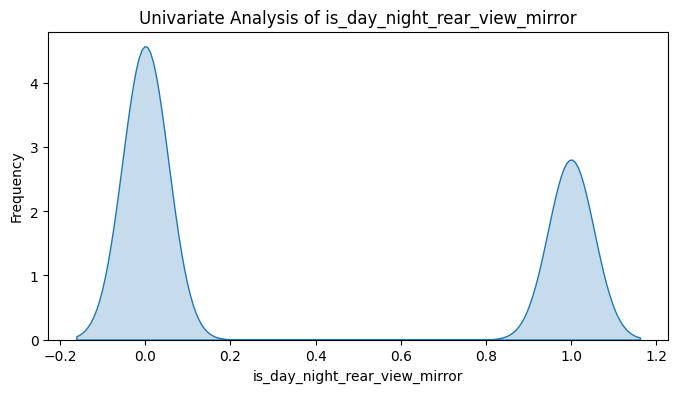

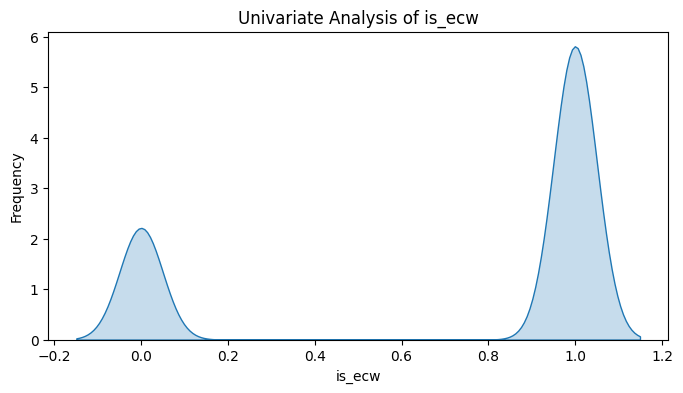

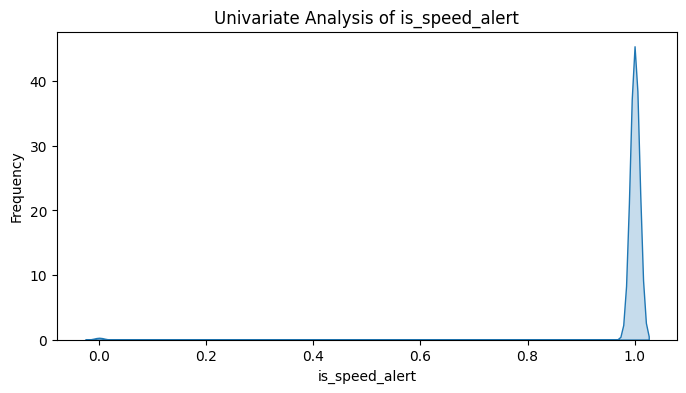

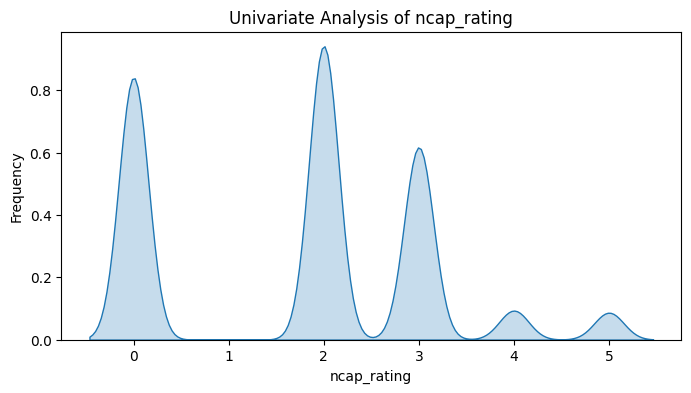

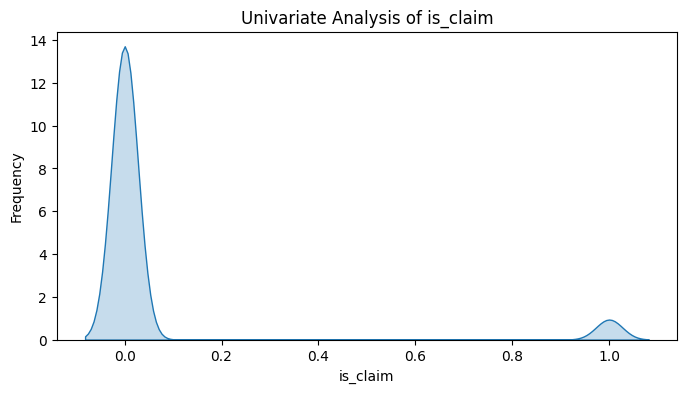

In [25]:
#univariate analysis
#kde chart
# add the skewness calculation in the code and make a list of the skeewed columns


import seaborn as sns
skewed_columns = []
for column in train.columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(train[column], fill=True)
    plt.title(f'Univariate Analysis of {column}')
    plt.xlabel(column)
    skewness = train[column].skew()
    if abs(skewness) > 1:
        skewed_columns.append(column)
    plt.ylabel('Frequency')
    plt.show()

hist and kde helps understand skewness

In [26]:
skewed_columns

['age_of_car',
 'population_density',
 'make',
 'is_tpms',
 'is_parking_sensors',
 'rear_brakes_type',
 'gear_box',
 'height',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_ecw',
 'is_speed_alert',
 'is_claim']

In [27]:
X_train= train.drop('is_claim', axis=1)
y_train= train['is_claim']


In [28]:
X_train

policy_id  policy_tenure  age_of_car  age_of_policyholder  \
0              0       0.515874        0.05             0.644231   
1              1       0.672619        0.02             0.375000   
2              2       0.841110        0.02             0.384615   
3              3       0.900277        0.11             0.432692   
4              4       0.596403        0.11             0.634615   
...          ...            ...         ...                  ...   
58587      58587       0.355089        0.13             0.644231   
58588      58588       1.199642        0.02             0.519231   
58589      58589       1.162273        0.05             0.451923   
58590      58590       1.236307        0.14             0.557692   
58591      58591       0.124429        0.02             0.442308   

       area_cluster  population_density  make  segment  model  fuel_type  ...  \
0                 0                4990     1        0      0          0  ...   
1                11               27003     1        0      0          0  ...   
2                15                4076     1        0      0          0  ...   
3                16               21622     1        3      3          2  ...   
4                17               34738     2        0      4          2  ...   
...             ...                 ...   ...      ...    ...        ...  ...   
58587            20                8794     2        0      4          2  ...   
58588             5                7788     1        0      0          0  ...   
58589            17               34738     1        0      0          0  ...   
58590            20                8794     1        2      7          2  ...   
58591            20                8794     3        4      5          1  ...   

       is_rear_window_defogger  is_brake_assist  is_power_door_locks  \
0                            0                0                    0   
1                            0                0                    0   
2                            0                0                    0   
3                            1                1                    1   
4                            0                0                    1   
...                        ...              ...                  ...   
58587                        0                0                    1   
58588                        0                0                    0   
58589                        0                0                    0   
58590                        0                1                    1   
58591                        1                1                    1   

       is_central_locking  is_power_steering  \
0                       0                  1   
1                       0                  1   
2                       0                  1   
3                       1                  1   
4                       1                  1   
...                   ...                ...   
58587                   1                  1   
58588                   0                  1   
58589                   0                  1   
58590                   1                  1   
58591                   1                  1   

       is_driver_seat_height_adjustable  is_day_night_rear_view_mirror  \
0                                     0                              0   
1                                     0                              0   
2                                     0                              0   
3                                     1                              1   
4                                     0                              1   
...                                 ...                            ...   
58587                                 0                              1   
58588                                 0                              0   
58589                                 0                              0   
58590                              

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before:", y_train.value_counts())
print("After:", y_resampled.value_counts())


Before: is_claim
0    54844
1     3748
Name: count, dtype: int64
After: is_claim
0    54844
1    54844
Name: count, dtype: int64


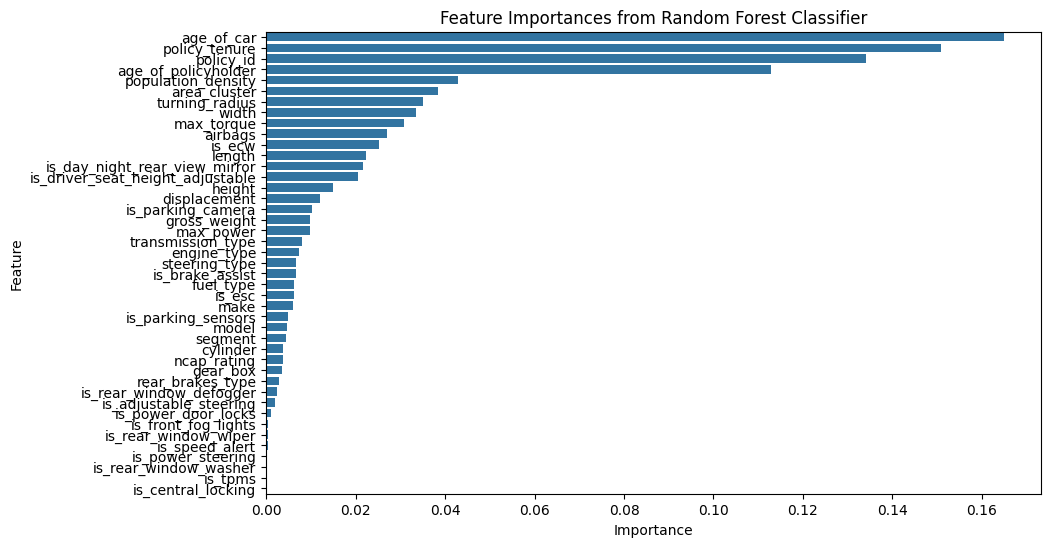

In [30]:

rf= RandomForestClassifier(n_estimators=5, class_weight='balanced', random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred= rf.predict(test)
# Feature Importance
importances = rf.feature_importances_
feature_names = X_resampled.columns
# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest Classifier')
plt.show()



#clearly according to the chart whe dont need many columns to make prediction but a handfull

In [31]:
#get the policy id with respect to prediction in y pred in a dataframebut before coverrt the test from scalered to original values
test_original= pd.read_csv('test.csv')
y_test= pd.read_csv('sample_submission.csv')
result_df= pd.DataFrame({'policy_id': test_original['policy_id'], 'is_claim': y_pred})
#is claim column in y_test dataframe is the actual values so find the accuracy, precion and recall
accuracy= accuracy_score(y_test['is_claim'], y_pred)
precision= precision_score(y_test['is_claim'], y_pred)
recall= recall_score(y_test['is_claim'], y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
result_df



Accuracy: 0.06771113329749379
Precision: 1.0
Recall: 0.06771113329749379


policy_id  is_claim
0       ID58593         0
1       ID58594         0
2       ID58595         0
3       ID58596         0
4       ID58597         0
...         ...       ...
39058   ID97651         0
39059   ID97652         0
39060   ID97653         0
39061   ID97654         0
39062   ID97655         0

[39063 rows x 2 columns]

Unique values in y_test: {1}
Unique values in y_pred: {np.int64(0), np.int64(1)}


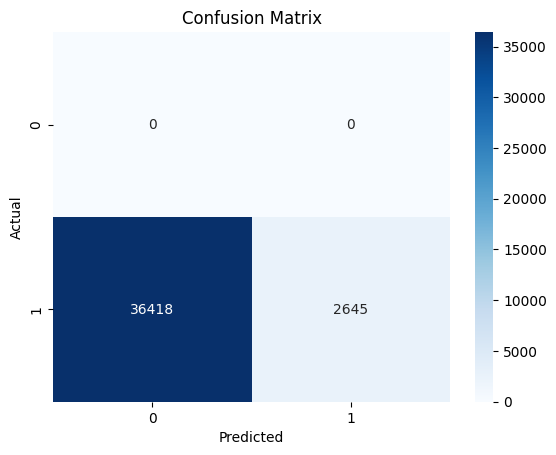

In [32]:
#confusion matrix

cm= confusion_matrix(y_test['is_claim'], y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
print("Unique values in y_test:", set(y_test['is_claim']))
print("Unique values in y_pred:", set(y_pred))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
%matplotlib inline

plt.show()

this is not to the par so change the model and try again 
new model lightgbm 


[LightGBM] [Info] Number of positive: 54844, number of negative: 54844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2873
[LightGBM] [Info] Number of data points in the train set: 109688, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Model - Accuracy: 0.000204797378593554
LightGBM Model - Precision: 1.0
LightGBM Model - Recall: 0.06771113329749379
Unique values in y_test: {1}
Unique values in y_pred: {np.int64(0), np.int64(1)}


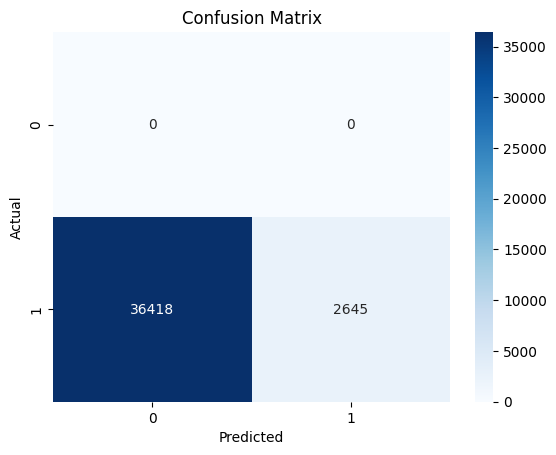

In [33]:
# Create the model
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    class_weight='balanced',  # handles class imbalance
    random_state=42
)

# Train
lgbm.fit(X_resampled, y_resampled)

# Predict
y_pred1 = lgbm.predict(test)
# Evaluate
accuracy = accuracy_score(y_test['is_claim'], y_pred1)
precision = precision_score(y_test['is_claim'], y_pred)
recall = recall_score(y_test['is_claim'], y_pred)
print(f'LightGBM Model - Accuracy: {accuracy}')
print(f'LightGBM Model - Precision: {precision}')
print(f'LightGBM Model - Recall: {recall}')
cm= confusion_matrix(y_test['is_claim'], y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
print("Unique values in y_test:", set(y_test['is_claim']))
print("Unique values in y_pred:", set(y_pred1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
%matplotlib inline

plt.show()


XGBoost Model - Accuracy: 0.48682896858920205
XGBoost Model - Precision: 1.0
XGBoost Model - Recall: 0.48682896858920205
Unique values in y_test: {1}
Unique values in y_pred: {np.int64(0), np.int64(1)}


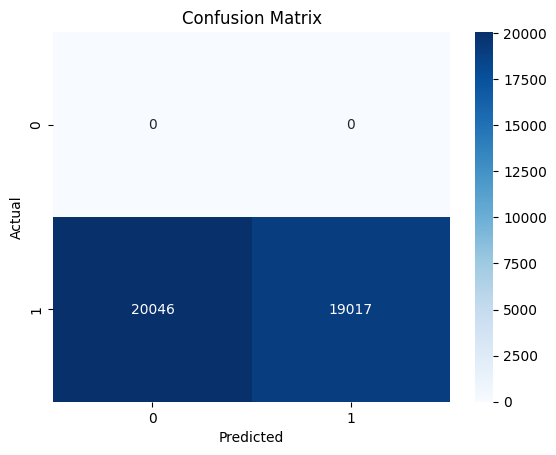

In [34]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight= (y_train==0).sum() / (y_train==1).sum(),  # handles class imbalance
    random_state=42
)
xgb_model.fit(X_resampled, y_resampled)
y_pred_xgb = xgb_model.predict(test)
accuracy_xgb = accuracy_score(y_test['is_claim'], y_pred_xgb)
precision_xgb = precision_score(y_test['is_claim'], y_pred_xgb)
recall_xgb = recall_score(y_test['is_claim'], y_pred_xgb)
print(f'XGBoost Model - Accuracy: {accuracy_xgb}')
print(f'XGBoost Model - Precision: {precision_xgb}')
print(f'XGBoost Model - Recall: {recall_xgb}')
cm= confusion_matrix(y_test['is_claim'], y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
print("Unique values in y_test:", set(y_test['is_claim']))
print("Unique values in y_pred:", set(y_pred_xgb))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
%matplotlib inline
plt.show()


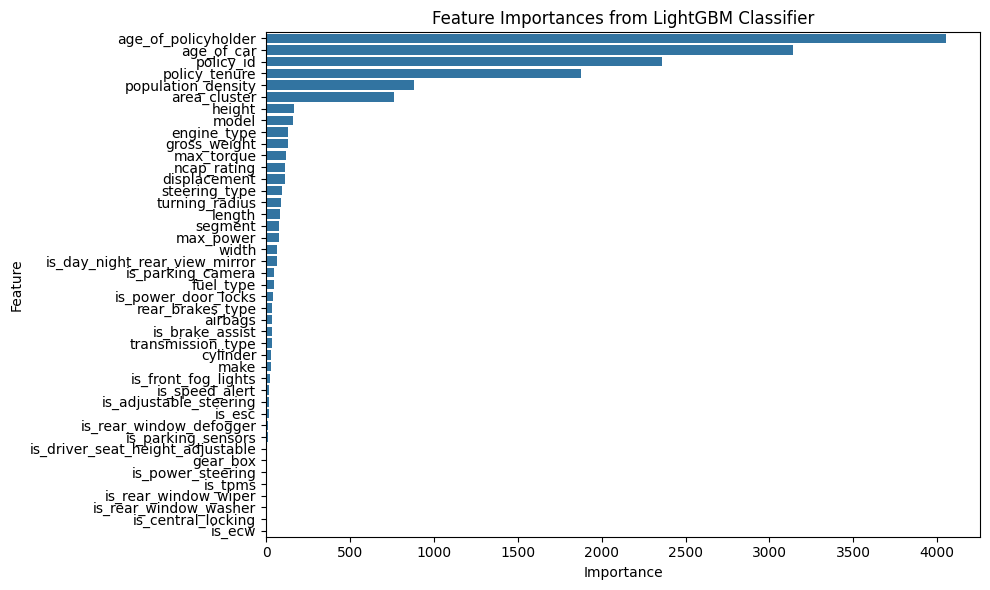

In [35]:
#show me the feature importance of the lgbm model
importances = lgbm.feature_importances_
feature_names = X_train.columns
# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from LightGBM Classifier')
plt.tight_layout()
plt.show()

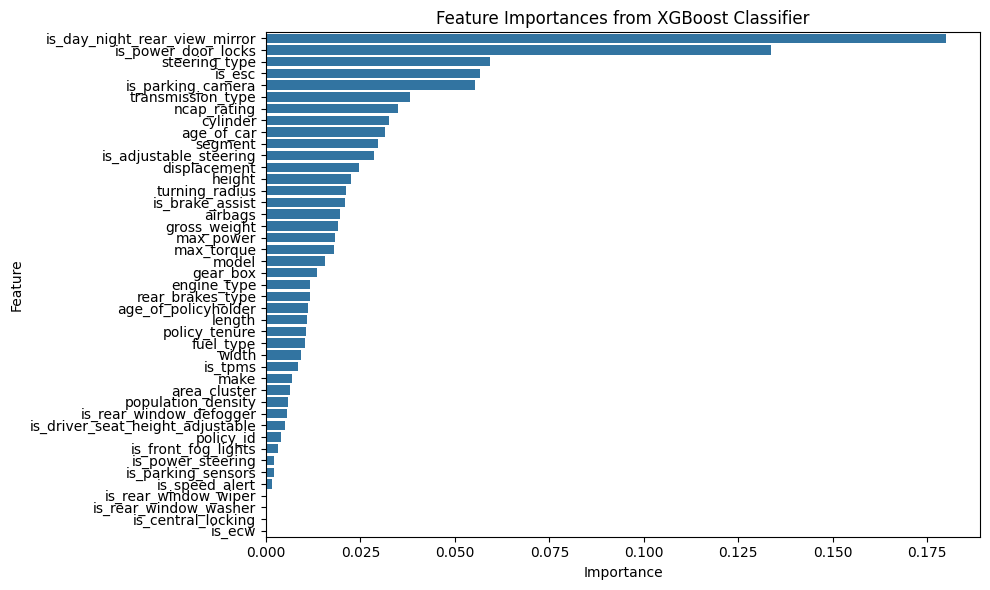

In [36]:
#show me the feature importance of the xgboost model
importances = xgb_model.feature_importances_
feature_names = X_train.columns
# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from XGBoost Classifier')
plt.tight_layout()
plt.show()

CatBoost Model - Accuracy: 0.9092491616107314
CatBoost Model - Precision: 1.0
CatBoost Model - Recall: 0.9092491616107314
Unique values in y_test: {1}
Unique values in y_pred: {np.int64(0), np.int64(1)}


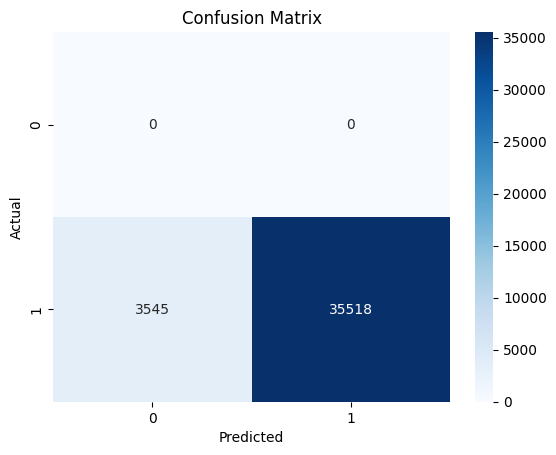

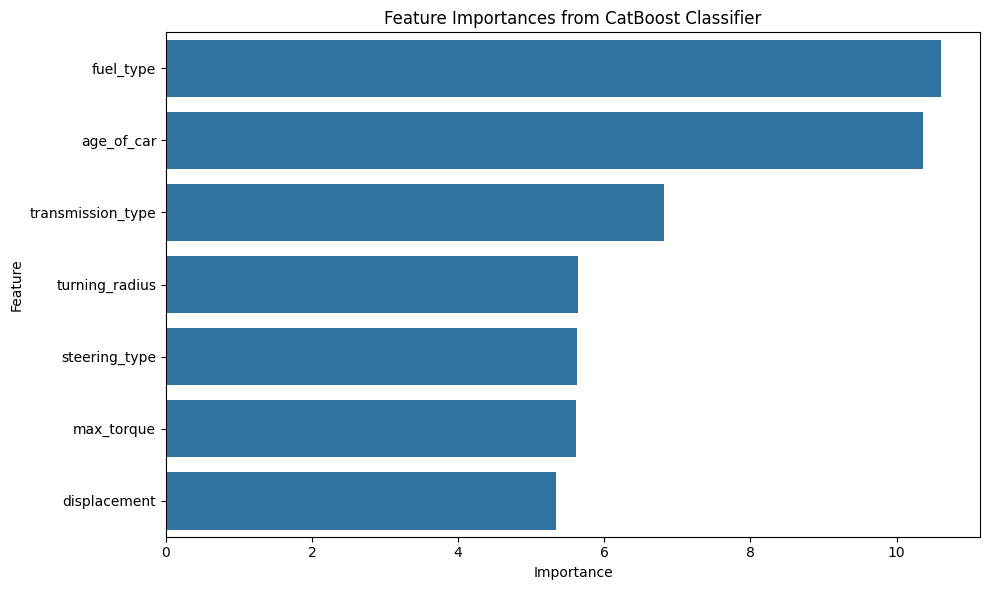

In [37]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    class_weights=[1, 60],  # handles class imbalance
    random_seed=42,
    verbose=0
)
cat_model.fit(X_resampled, y_resampled)
y_pred_cat = cat_model.predict(test)
accuracy_cat = accuracy_score(y_test['is_claim'], y_pred_cat)
precision_cat = precision_score(y_test['is_claim'], y_pred_cat)
recall_cat = recall_score(y_test['is_claim'], y_pred_cat)
print(f'CatBoost Model - Accuracy: {accuracy_cat}')
print(f'CatBoost Model - Precision: {precision_cat}')
print(f'CatBoost Model - Recall: {recall_cat}')
cm= confusion_matrix(y_test['is_claim'], y_pred_cat)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
print("Unique values in y_test:", set(y_test['is_claim']))
print("Unique values in y_pred:", set(y_pred_cat))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
%matplotlib inline
plt.show()
importances = cat_model.get_feature_importance()
feature_names = X_train.columns
# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
# Plot Feature Importances save feature importance >6
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df[importances_df['Importance'] >= 5])
plt.title('Feature Importances from CatBoost Classifier')
plt.tight_layout()
plt.show()


Out of all catboost gives the best acuracy we will implement it further


# save the model, acuracy and lets make streamlit model

In [38]:
def save_model(model, filename):
    import pickle
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
        print(f'Model saved to {filename}')

save_model(cat_model, 'catboost_model.pkl')


Model saved to catboost_model.pkl


encoders needed

# evaluation metrics save

In [39]:
#save evaluation metrics
def save_metrics(accuracy, precision, recall, filename):
    import pickle
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall
    }
    with open(filename, 'wb') as file:
        pickle.dump(metrics, file)
        print(f'Metrics saved to {filename}')
save_metrics(accuracy_cat, precision_cat, recall_cat, 'evaluation_metrics.pkl')

Metrics saved to evaluation_metrics.pkl


Save the prediction with policy id

In [40]:
#save the prediction with policy id
def save_predictions(policy_ids, predictions, filename):
    import pandas as pd
    result_df= pd.DataFrame({'policy_id': policy_ids, 'is_claim': predictions})
    result_df.to_csv(filename, index=False)
    print(f'Predictions saved to {filename}')
    result_df= pd.DataFrame({'policy_id': test_original['policy_id'], 'is_claim': y_pred_cat})
save_predictions(test_original['policy_id'], y_pred_cat, 'catboost_predictions.csv')
#save the feature importances
def save_feature_importances(feature_names, importances, filename):
    import pandas as pd
    importances_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    importances_df.to_csv(filename, index=False)
    print(f'Feature importances saved to {filename}')
save_feature_importances(feature_names, importances, 'catboost_feature_importances.csv')

Predictions saved to catboost_predictions.csv
Feature importances saved to catboost_feature_importances.csv


In [41]:
X_resampled.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating'],
      dtype='object')

In [43]:
def load_model(filename):
    import pickle
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model
model = load_model('catboost_model.pkl')
#Predict model
def predict_churn(input_data):
    import numpy as np
    input_array = np.array(input_data).reshape(1, -1)
    prediction = model.predict(input_array)
    return prediction[0]
# load encoder
def load_encoder(filename):
    import pickle 
    with open (filename, 'rb') as file:
        encoder = pickle.load(file)
        return encoder
encoder= load_encoder("le_encoder.pkl")
 

In [45]:
encoder["policy_id"]

LabelEncoder()

In [ ]:
train= pd.read_csv("train.csv")


In [ ]:
# model training finishes over here lets move towards dashboard and streamlit